# Start

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

from wrangle import get_pokemon, prepare_pokemon, train_validate_test, get_object_cols, get_numeric_X_cols, ready_for_battle, pokemon_split

I just started playing Pokemon Sword, it's nothing like I expected so far. I have no idea who any of these Pokemon are.
My starter was Scorbunny, a clearly visible fire type hyper-bunny. On the search for a perfect female Yamper, I leveled him up so much that he is now Raboot. My rival hasn't even evolved his yet...I knocked him out. 

I'm starting to train for my first gym battle. I'm a little nervous, because I know my Raboot does well against certain Pokemon, but there are some where he doesn't inflict damage as expected and I have to resort to going through my party to see who's going to take care of my opponent. 

However, Raboot is my main guy. I depend on him to do the most damage, take the least damage, and may he carry us through all of our battles so my other Pokemon can (mostly) sit out and get EXP. There are just times I really rely on my Yampers, 

but when should I pull Raboot from battle so I don't have to waste any potions/revives in case he goes up against someone he would fall against? 

I need to find out...if I am warned about who's going up against my bunny, when should I switch him out for another party member? 

I think an approach I will take is to be able to predict type_1. Since there are 18 types but only less than a thousand pokemon (not including the megas, which I still don't know the difference) I think it's best to just try to see if my model can predict if a pokemon is going to be a threat to my Raboot

In [2]:
#read the csv
df = get_pokemon()

In [3]:
#handle missing values and drop the columns we are sure we aren't using
df = prepare_pokemon(df)

In [4]:
#check
df

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1038,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1039,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1040,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [5]:
#assuring our prep function took care of nulls
df.isna().sum().sum()

0

In [6]:
#pulling up data for my starter
df[df.name=='Scorbunny']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
947,813,Scorbunny,8,Normal,Rabbit Pokémon,1,Fire,None,0.3,4.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [7]:
#his next form
df[df.name=='Raboot']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
948,814,Raboot,8,Normal,Rabbit Pokémon,1,Fire,None,0.6,9.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [8]:
#his final form?
df[df.name=='Cinderace']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
949,815,Cinderace,8,Normal,Striker Pokémon,1,Fire,None,1.4,33.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [9]:
#anyways I just thought that would be fun to see, let's start exploring

In [10]:
df.dtypes

pokedex_number        int64
name                 object
generation            int64
status               object
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points          int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male      object
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       float64
against_electric    float64
against_grass       float64
against_ice         

In [11]:
df = df.drop(columns=['pokedex_number','catch_rate','base_friendship','base_experience','egg_type_number','egg_type_1','egg_type_2','percentage_male','egg_cycles'])

In [12]:
df

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,2,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,1,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1038,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,1,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1039,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,1,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1040,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,1,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [13]:
target = 'type_1'

In [14]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

In [15]:
df.type_1.value_counts()

Water       134
Normal      114
Grass        91
Psychic      81
Bug          81
Fire         65
Electric     61
Rock         60
Dark         46
Fighting     42
Ghost        42
Ground       41
Dragon       41
Poison       40
Ice          37
Steel        36
Fairy        22
Flying        8
Name: type_1, dtype: int64

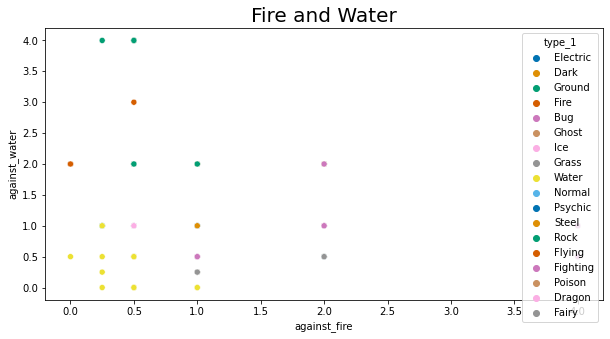

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='against_fire',y='against_water',data=train,hue='type_1', palette='colorblind')
plt.title('Fire and Water', fontsize = 20)
plt.show()


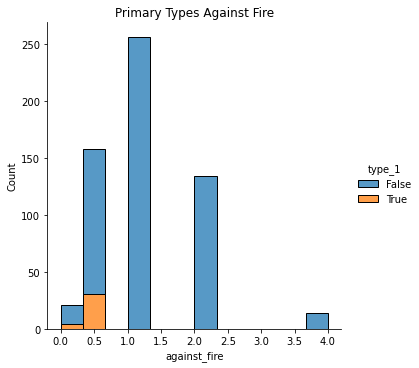

In [17]:
sns.displot(train, x='against_fire', hue = train.type_1=='Fire', multiple= 'stack')
plt.title('Primary Types Against Fire')
plt.show()

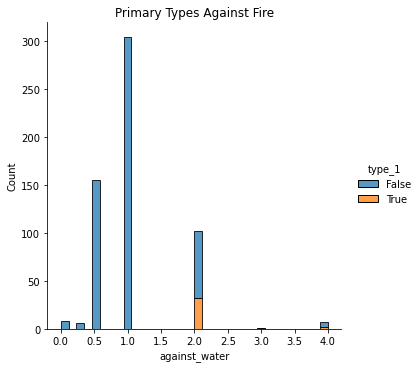

In [18]:
sns.displot(train, x='against_water', hue = train.type_1=='Fire', multiple='stack')
plt.title('Primary Types Against Fire')
plt.show()

In [19]:
train.columns

Index(['name', 'generation', 'status', 'species', 'type_number', 'type_1',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'growth_rate',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

In [20]:
def fire_against_types(train, x, hue, multiple='stack'):
    cols = train.columns[21:]
    for i in cols:
        sns.displot(train, x=i, hue= train.type_1=='Fire', multiple='stack')

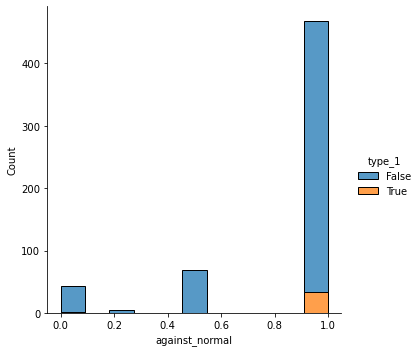

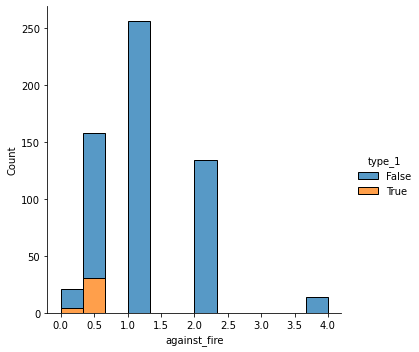

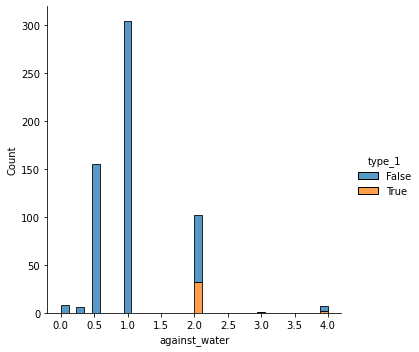

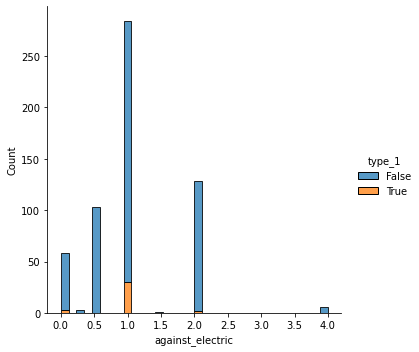

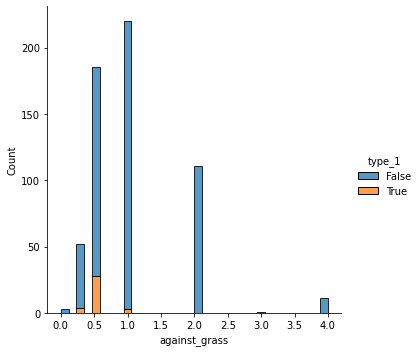

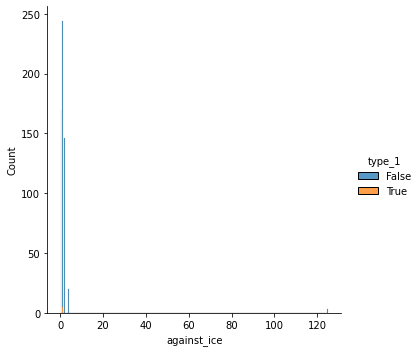

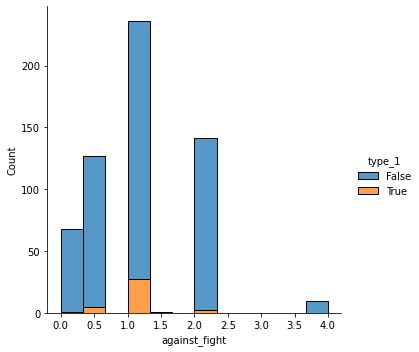

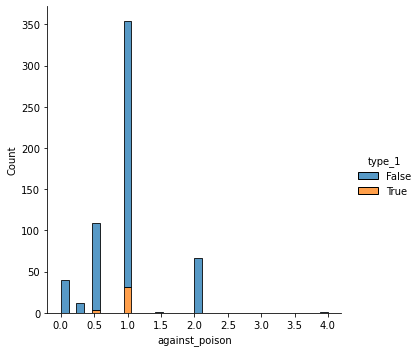

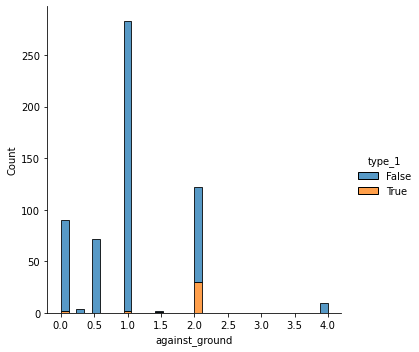

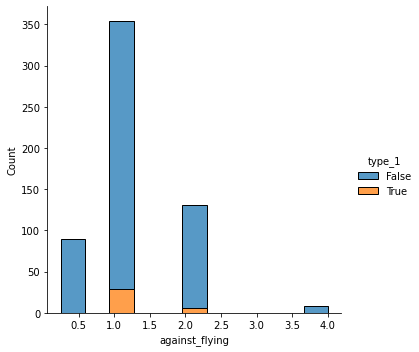

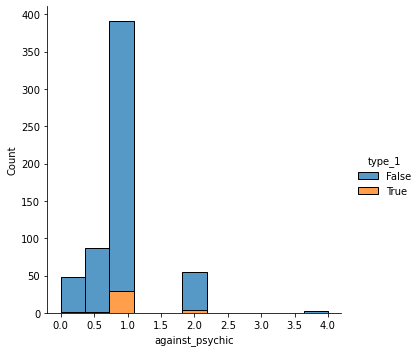

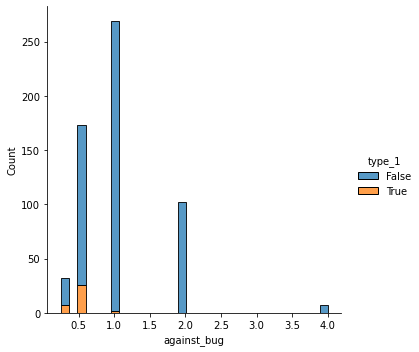

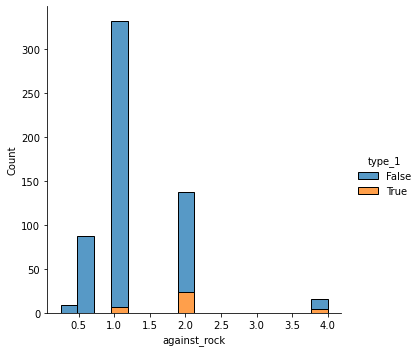

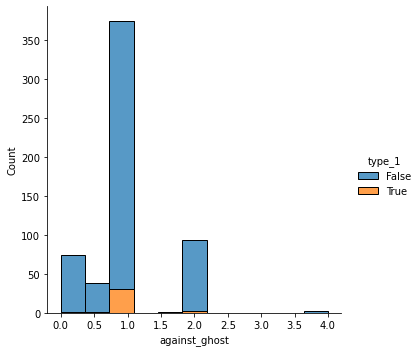

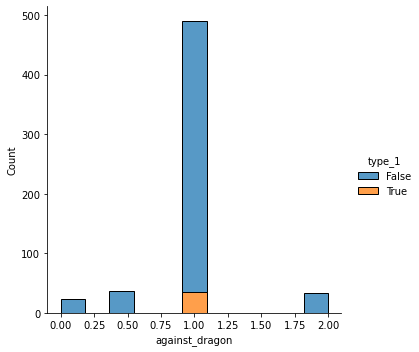

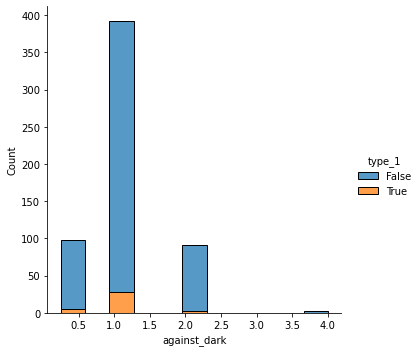

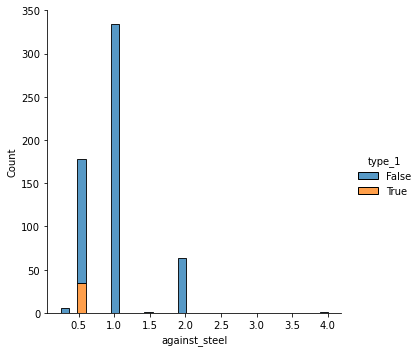

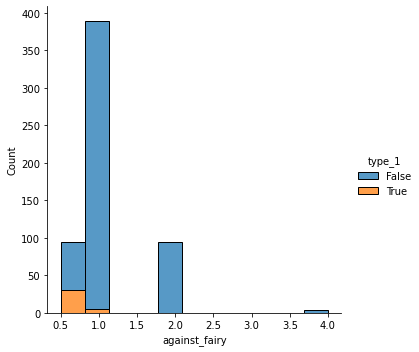

In [21]:
cols = train.columns[21:]
hue = train.type_1=='Fire'
for i in cols:
    sns.displot(train, x=i, hue=train.type_1=='Fire', multiple='stack')
    plt.show()

In [22]:
# for col in train.columns[21:]:
#     plt.hist(train[col])
#     plt.title(col)
#     plt.show()

In [23]:
df.against_ice.max()

125.0

In [24]:
df[df.against_ice==125]

,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
114,Dewgong,1,Normal,Sea Lion Pokémon,2,Water,Ice,1.7,120.0,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
434,Spheal,3,Normal,Clap Pokémon,2,Ice,Water,0.8,39.5,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
435,Sealeo,3,Normal,Ball Roll Pokémon,2,Ice,Water,1.1,87.6,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
436,Walrein,3,Normal,Ice Break Pokémon,2,Ice,Water,1.4,150.6,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


In [25]:
#what's with those outliers on against_ice

In [26]:
df = df[(np.abs(stats.zscore(df['against_ice'])) < 3)]

In [27]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

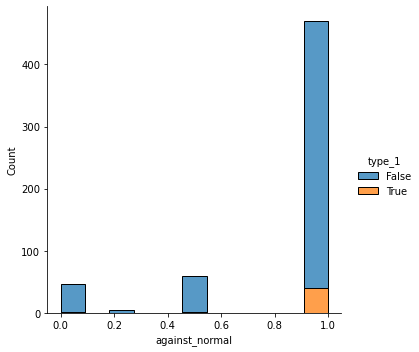

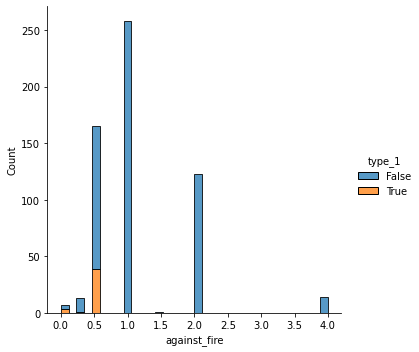

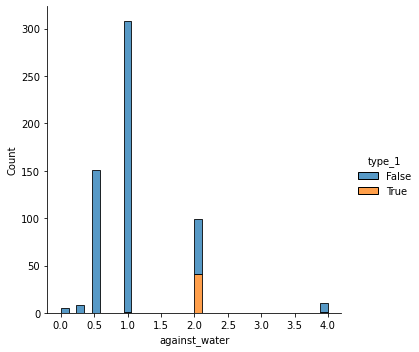

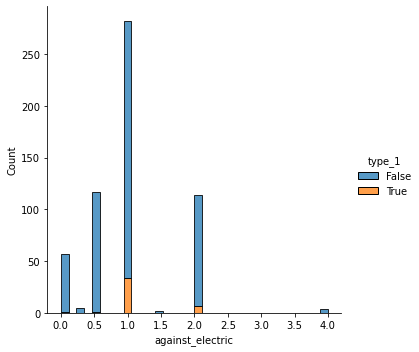

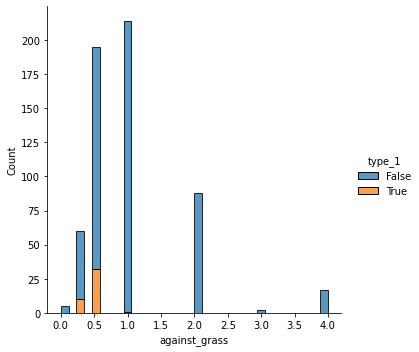

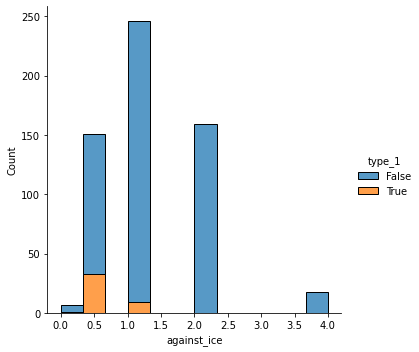

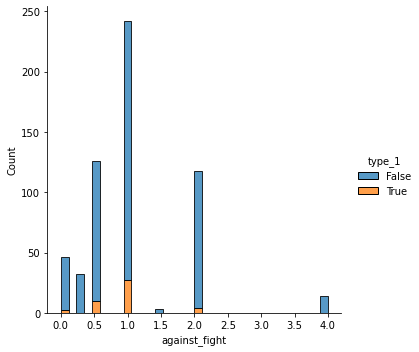

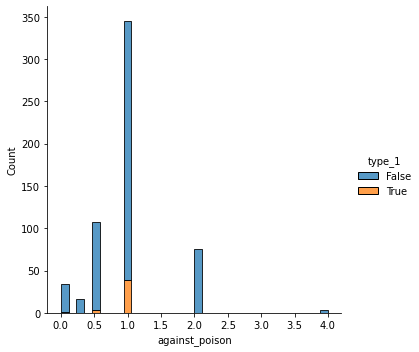

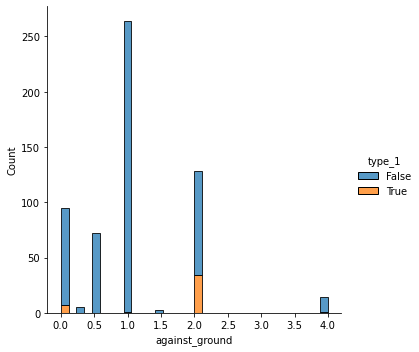

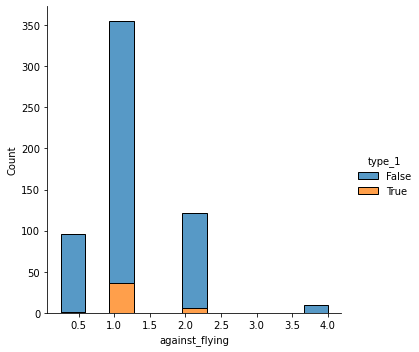

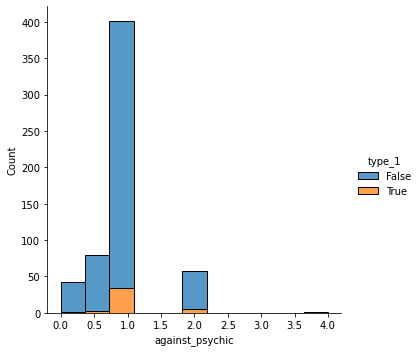

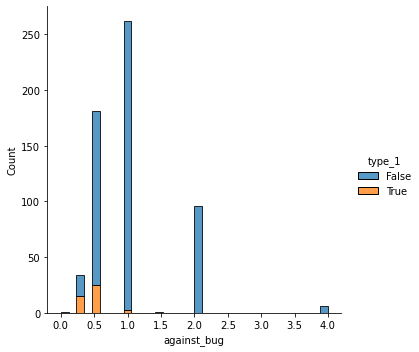

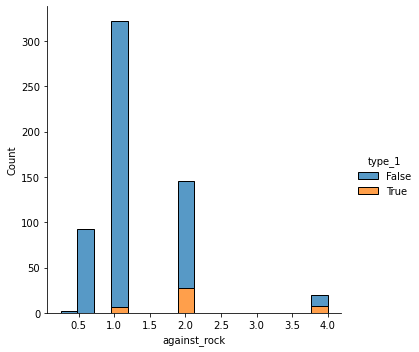

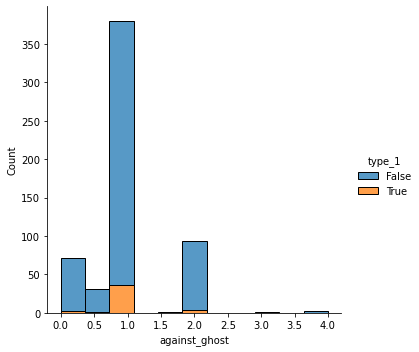

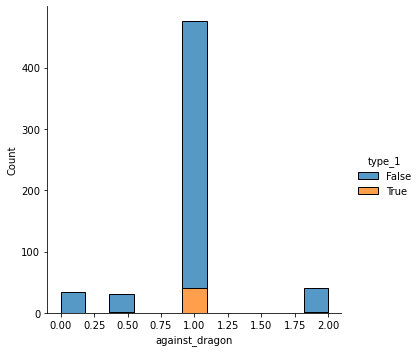

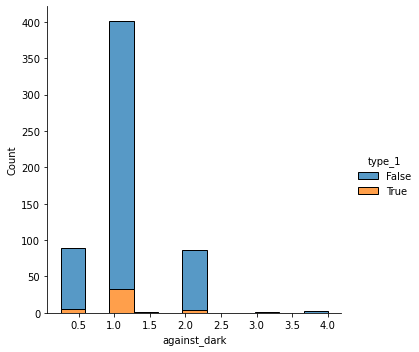

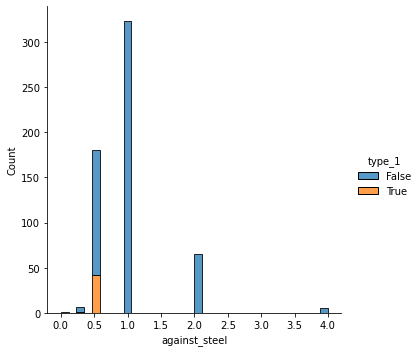

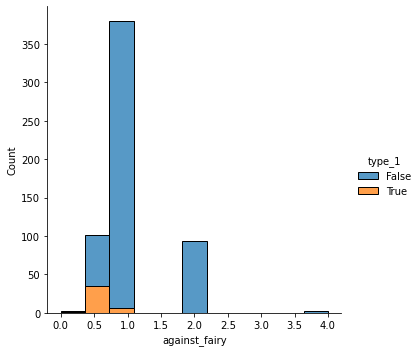

In [28]:
cols = train.columns[21:]
hue = train.type_1=='Fire'
for i in cols:
    sns.displot(train, x=i, hue=train.type_1=='Fire', multiple='stack')
    plt.show()

if the orange is in the middle/right parts of the graph, it means my Scorbunny is weak/significantly affected by it 
I did not include normal or dragon because the highest value for normal is 1, and the highest value of dragon is 2 when the norm scale is 0-4. 

So here are the types I need to look out for:

- Water
- Ground 
- Rock 

In [29]:
#Thank you Xavier!!!!
df.loc[(df['type_1']== "Water") | (df['type_1']== "Ground") | (df['type_1']== "Rock"), "is_weakness"] = 1

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
#Thanks Xavier for helping me make this column. 
df.is_weakness = df.is_weakness.fillna(0)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df['is_weakness']= (df['is_weakness']).astype(int)

<ipython-input-31-af0cd7439731>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_weakness']= (df['is_weakness']).astype(int)


In [32]:
df.columns

Index(['name', 'generation', 'status', 'species', 'type_number', 'type_1',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'growth_rate',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'is_weakness'],
      dtype='object')

# Ready for Battle!!! (ready for battle, right?)

In [33]:
df = get_pokemon()

In [34]:
df = ready_for_battle(df)

In [35]:
df

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_weakness
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0
1034,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,...,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,0
1035,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,...,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,0
1036,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,...,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,0


In [36]:
df.is_weakness.counts()

0    763
1    275
Name: is_weakness, dtype: int64

In [37]:
train, validate, test = pokemon_split(df)

In [38]:
train.shape, validate.shape, test.shape

((581, 41), (249, 41), (208, 41))

In [39]:
df.type_2.value_counts()

None        490
Flying      112
Fairy        41
Psychic      40
Ground       39
Poison       38
Steel        35
Fighting     32
Dragon       31
Grass        28
Dark         27
Ghost        26
Ice          19
Water        17
Fire         17
Rock         15
Normal       11
Electric     11
Bug           9
Name: type_2, dtype: int64

In [40]:
#Thank you Xavier!!!!
df.loc[(df['type_1']== "Water") | (df['type_1']== "Ground") | (df['type_1']== "Rock") | (df['type_2']== "Water") | (df['type_2']== "Rock") | (df['type_2']=="Ground")
       , "is_weakness"] = 1

In [41]:
df.is_weakness.value_counts()

0    763
1    275
Name: is_weakness, dtype: int64

In [42]:
df.is_weakness = df.is_weakness.fillna(0)

In [43]:
df.is_weakness.value_counts()

0    763
1    275
Name: is_weakness, dtype: int64

<br>

### No really, we are

In [2]:
df = get_pokemon()

In [3]:
df = ready_for_battle(df)

In [4]:
df.is_weakness.value_counts()

0    763
1    275
Name: is_weakness, dtype: int64

In [47]:
train, validate, test = pokemon_split(df)

In [48]:
train

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_weakness
305,254,Mega Sceptile,3,Normal,Forest Pokémon,2,Grass,Dragon,1.9,55.2,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0
36,27,Alolan Sandshrew,1,Normal,Mouse Pokémon,2,Ice,Steel,0.7,40.0,...,0.5,0.5,0.5,1.0,1.0,0.5,1.0,1.0,0.5,0
759,653,Fennekin,6,Normal,Fox Pokémon,1,Fire,None,0.4,9.4,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0
476,399,Bidoof,4,Normal,Plump Mouse Pokémon,1,Normal,None,0.5,20.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0
278,229,Mega Houndoom,2,Normal,Dark Pokémon,2,Dark,Fire,1.9,49.5,...,1.0,0.0,1.0,2.0,0.5,1.0,0.5,0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,333,Swablu,3,Normal,Cotton Bird Pokémon,2,Normal,Flying,0.4,1.2,...,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0,0
388,325,Spoink,3,Normal,Bounce Pokémon,1,Psychic,None,0.7,30.6,...,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0
778,671,Florges,6,Normal,Garden Pokémon,1,Fairy,None,1.1,10.0,...,1.0,1.0,0.5,1.0,1.0,0.0,0.5,2.0,1.0,0
14,11,Metapod,1,Normal,Cocoon Pokémon,1,Bug,None,0.7,9.9,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0


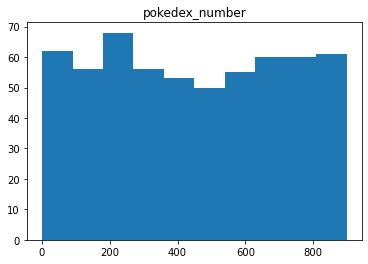

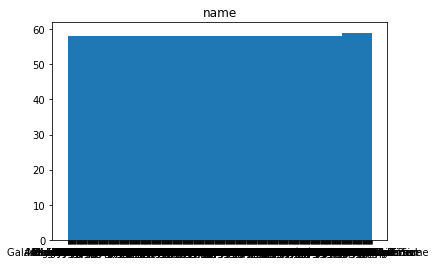

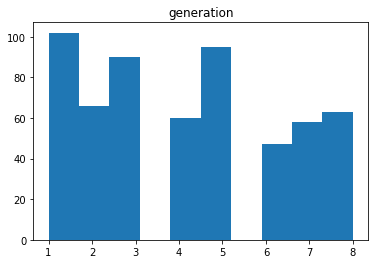

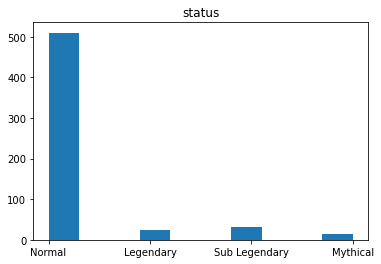

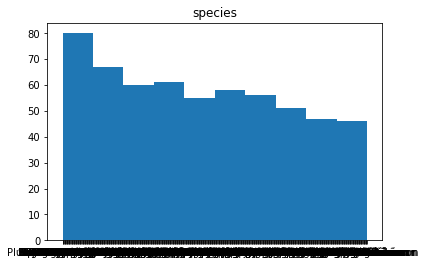

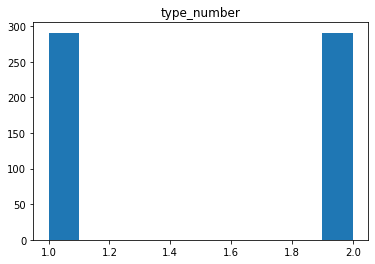

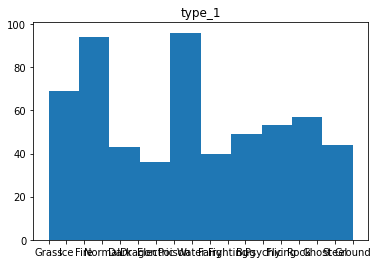

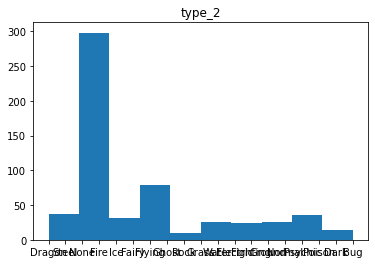

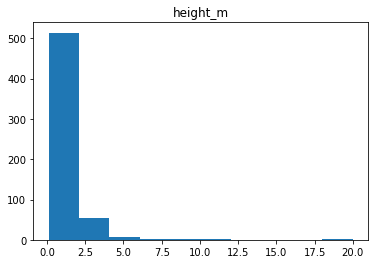

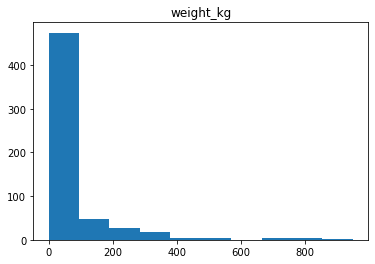

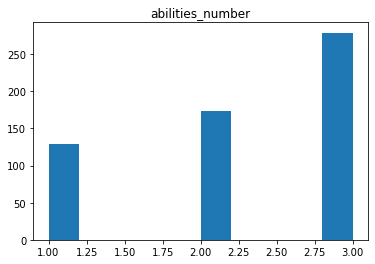

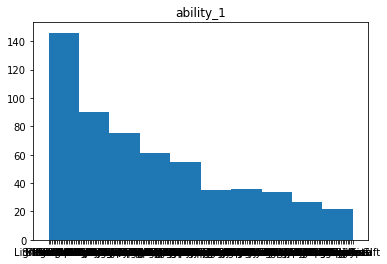

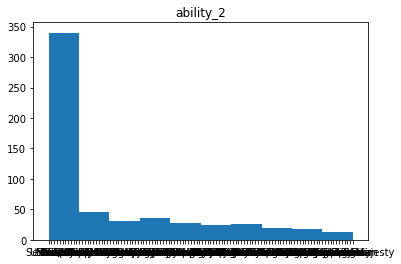

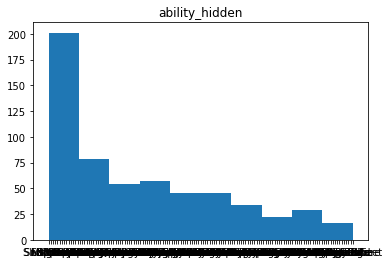

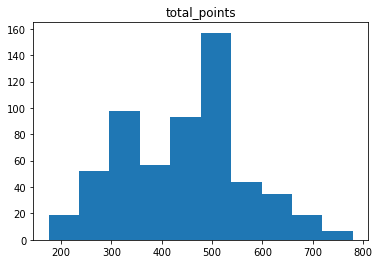

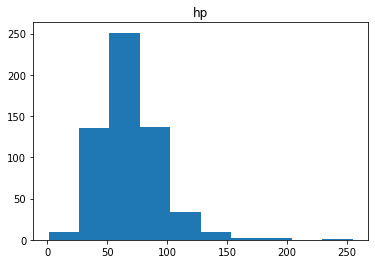

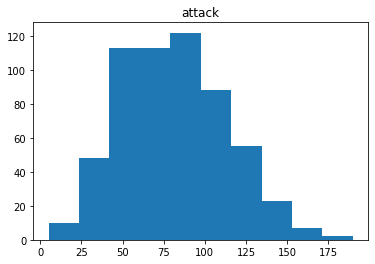

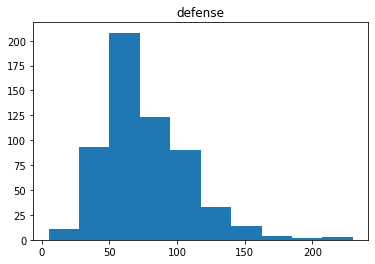

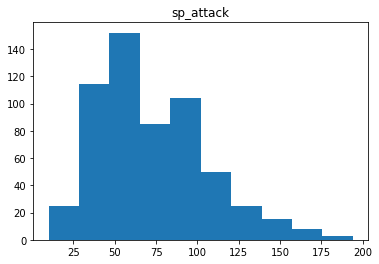

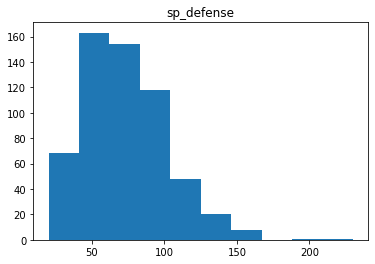

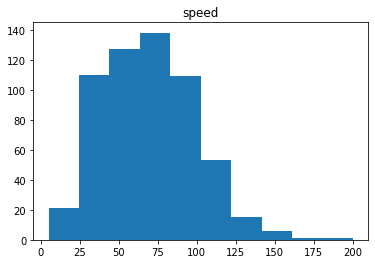

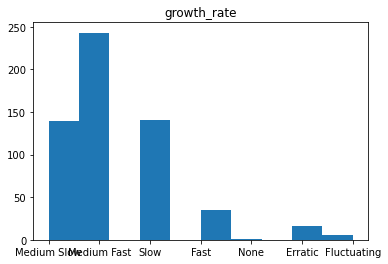

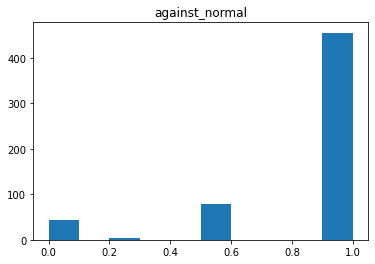

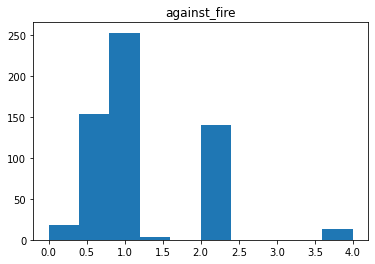

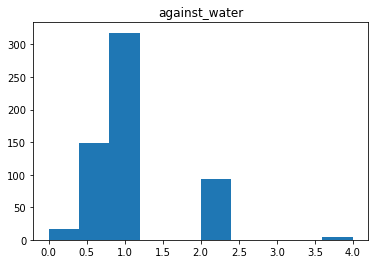

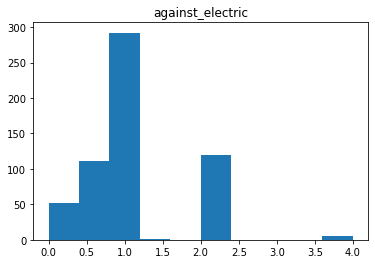

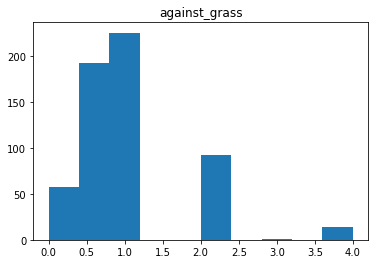

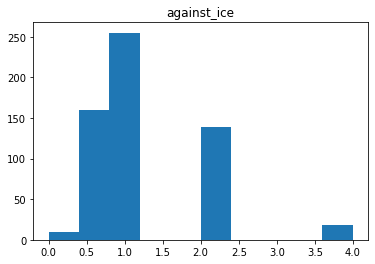

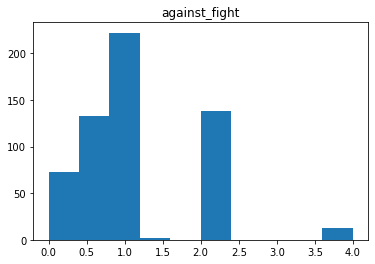

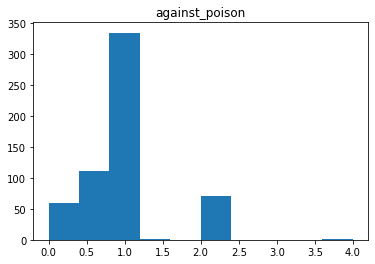

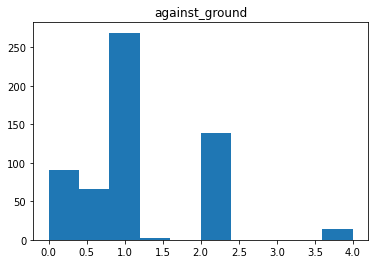

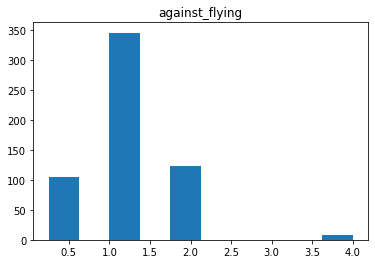

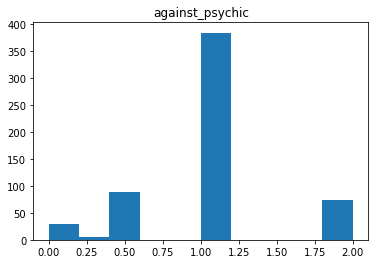

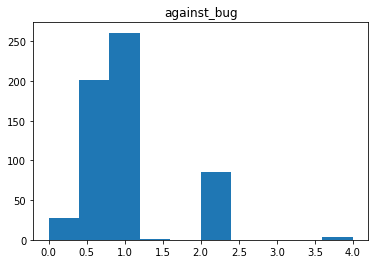

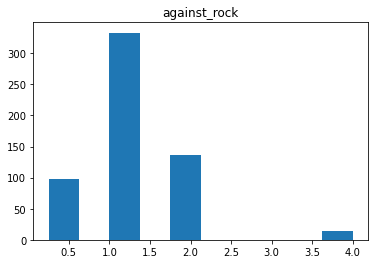

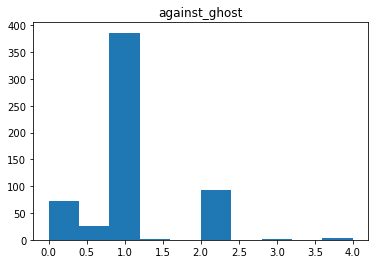

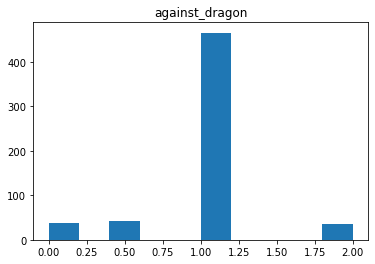

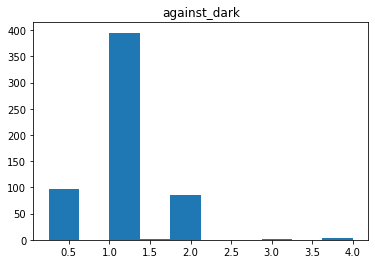

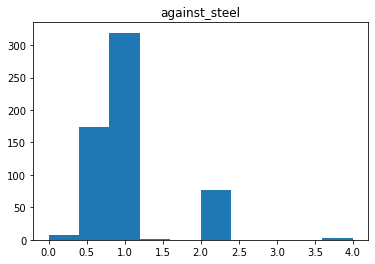

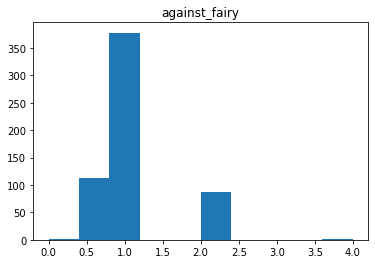

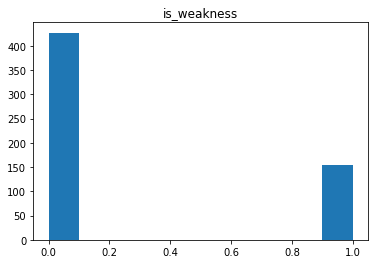

In [49]:
#univariate exploration
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [50]:
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    #sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()

In [51]:
train.columns[22:]

Index(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'is_weakness'],
      dtype='object')

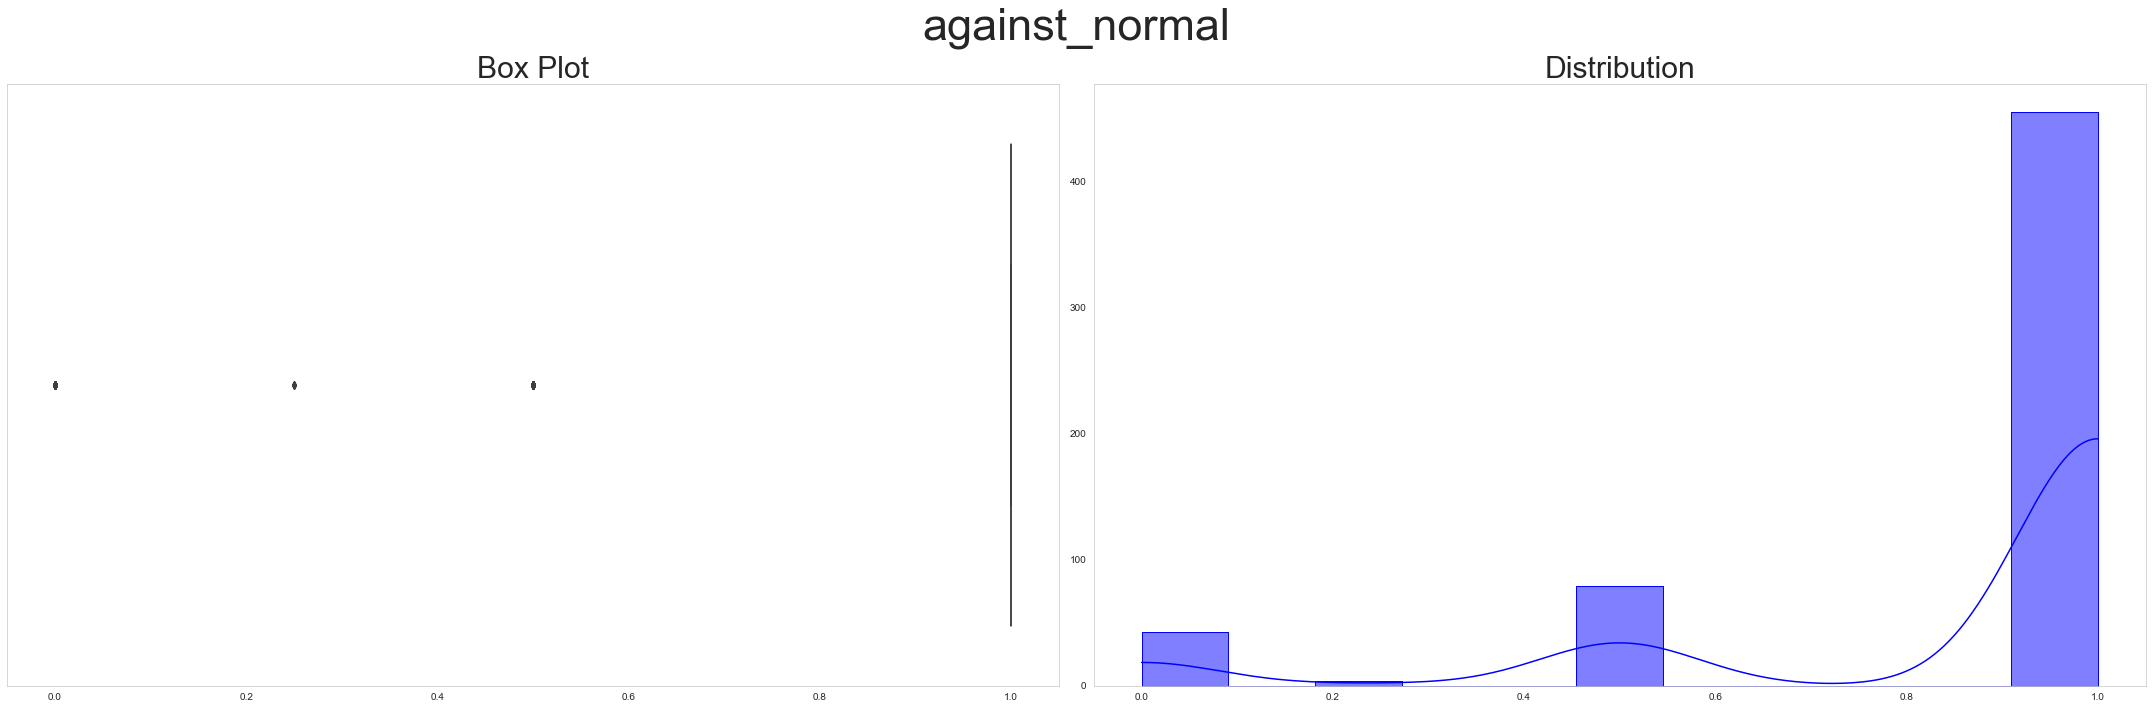

Summary Statistics for against_normal
count    581.000000
mean       0.852840
std        0.300625
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: against_normal, dtype: float64


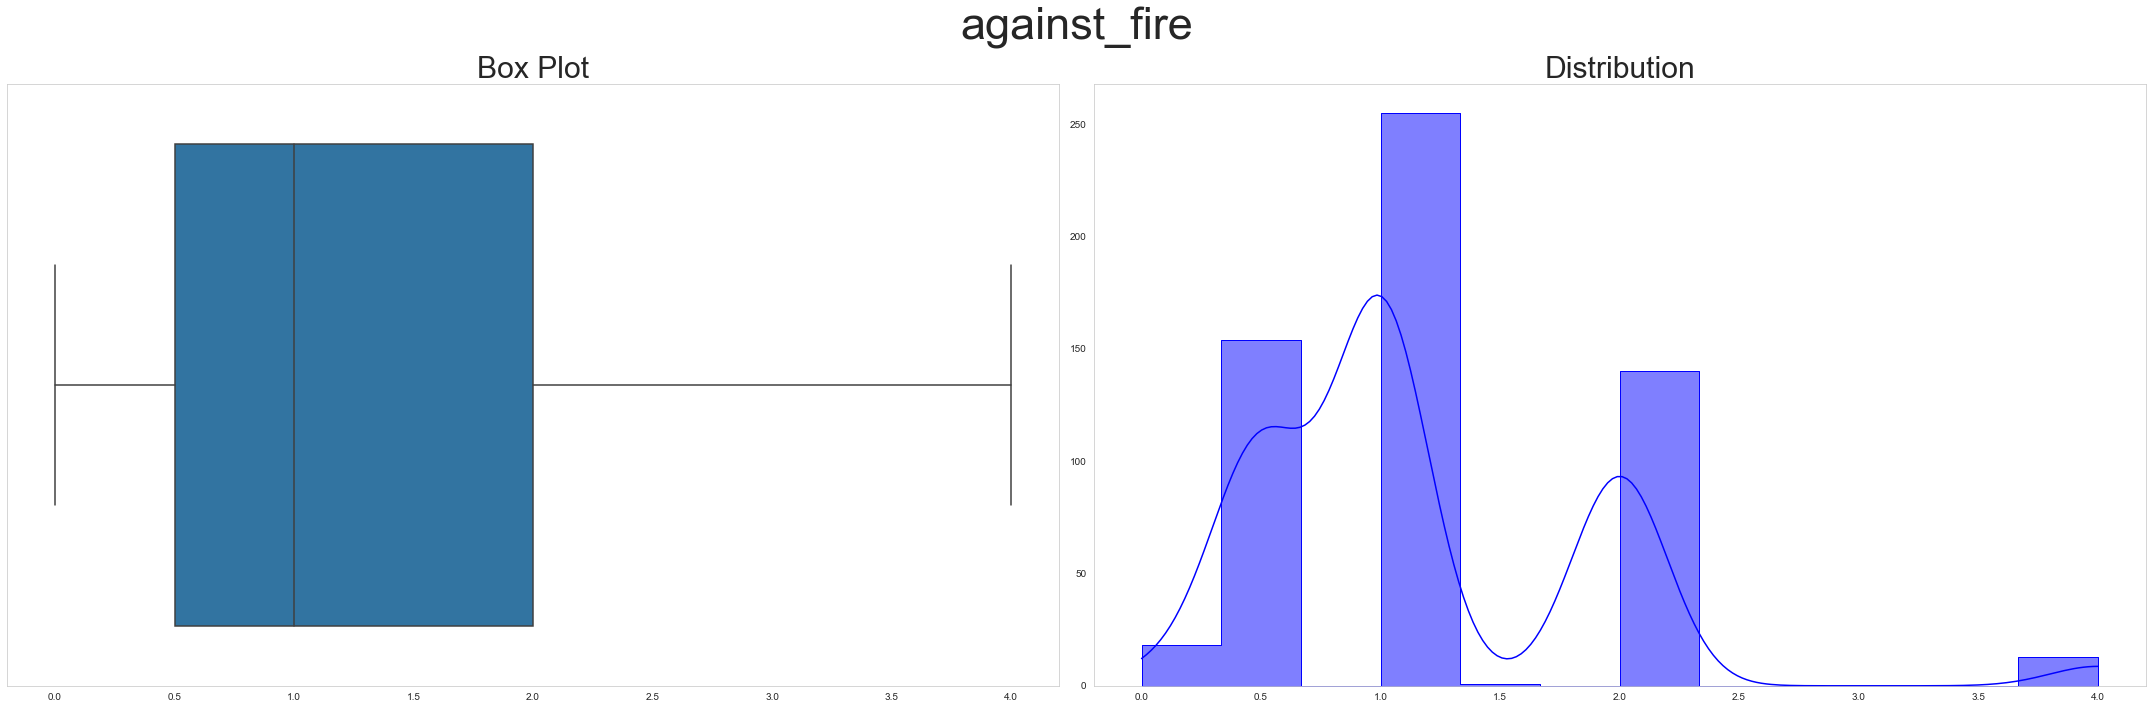

Summary Statistics for against_fire
count    581.000000
mean       1.151463
std        0.713534
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        4.000000
Name: against_fire, dtype: float64


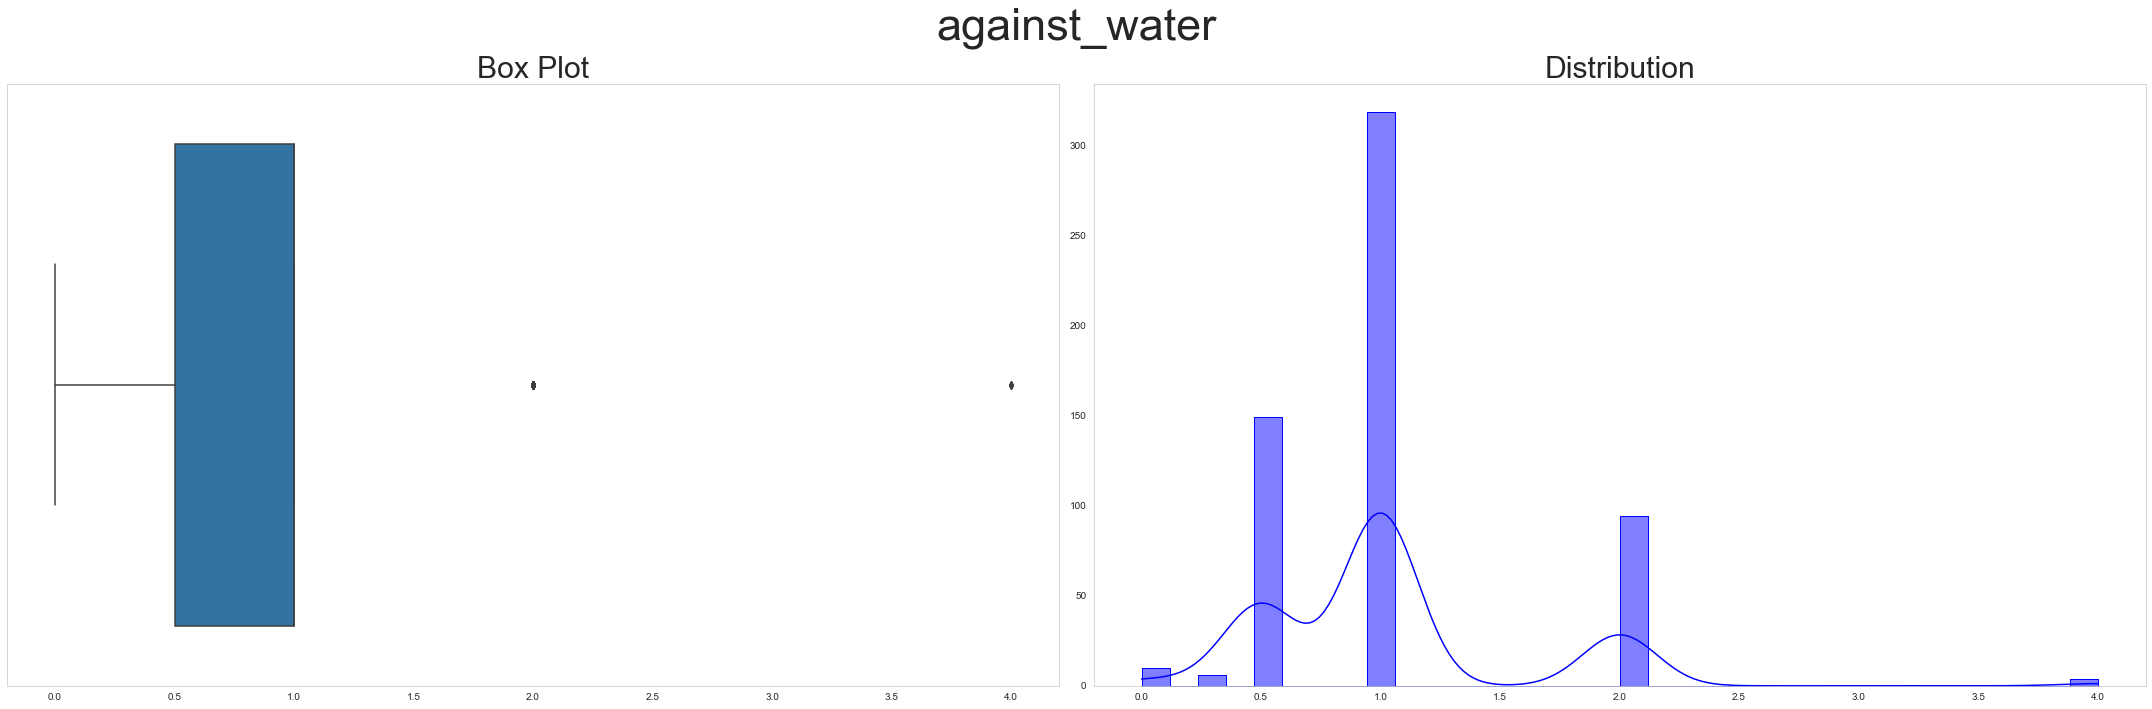

Summary Statistics for against_water
count    581.000000
mean       1.029260
std        0.557283
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_water, dtype: float64


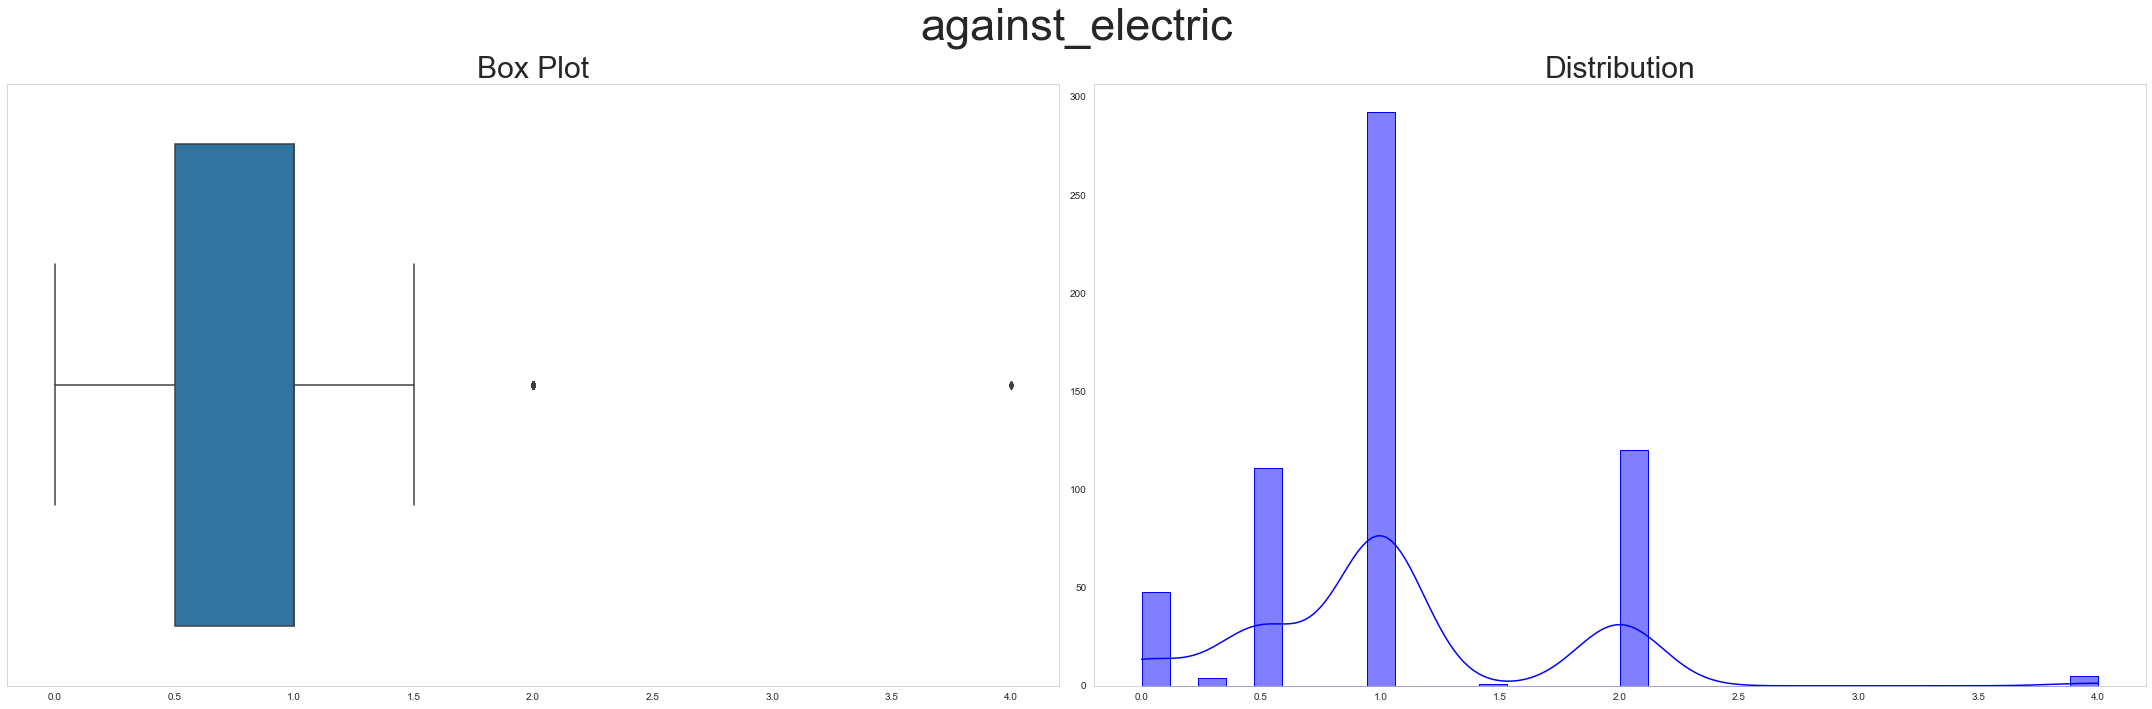

Summary Statistics for against_electric
count    581.000000
mean       1.049914
std        0.645679
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_electric, dtype: float64


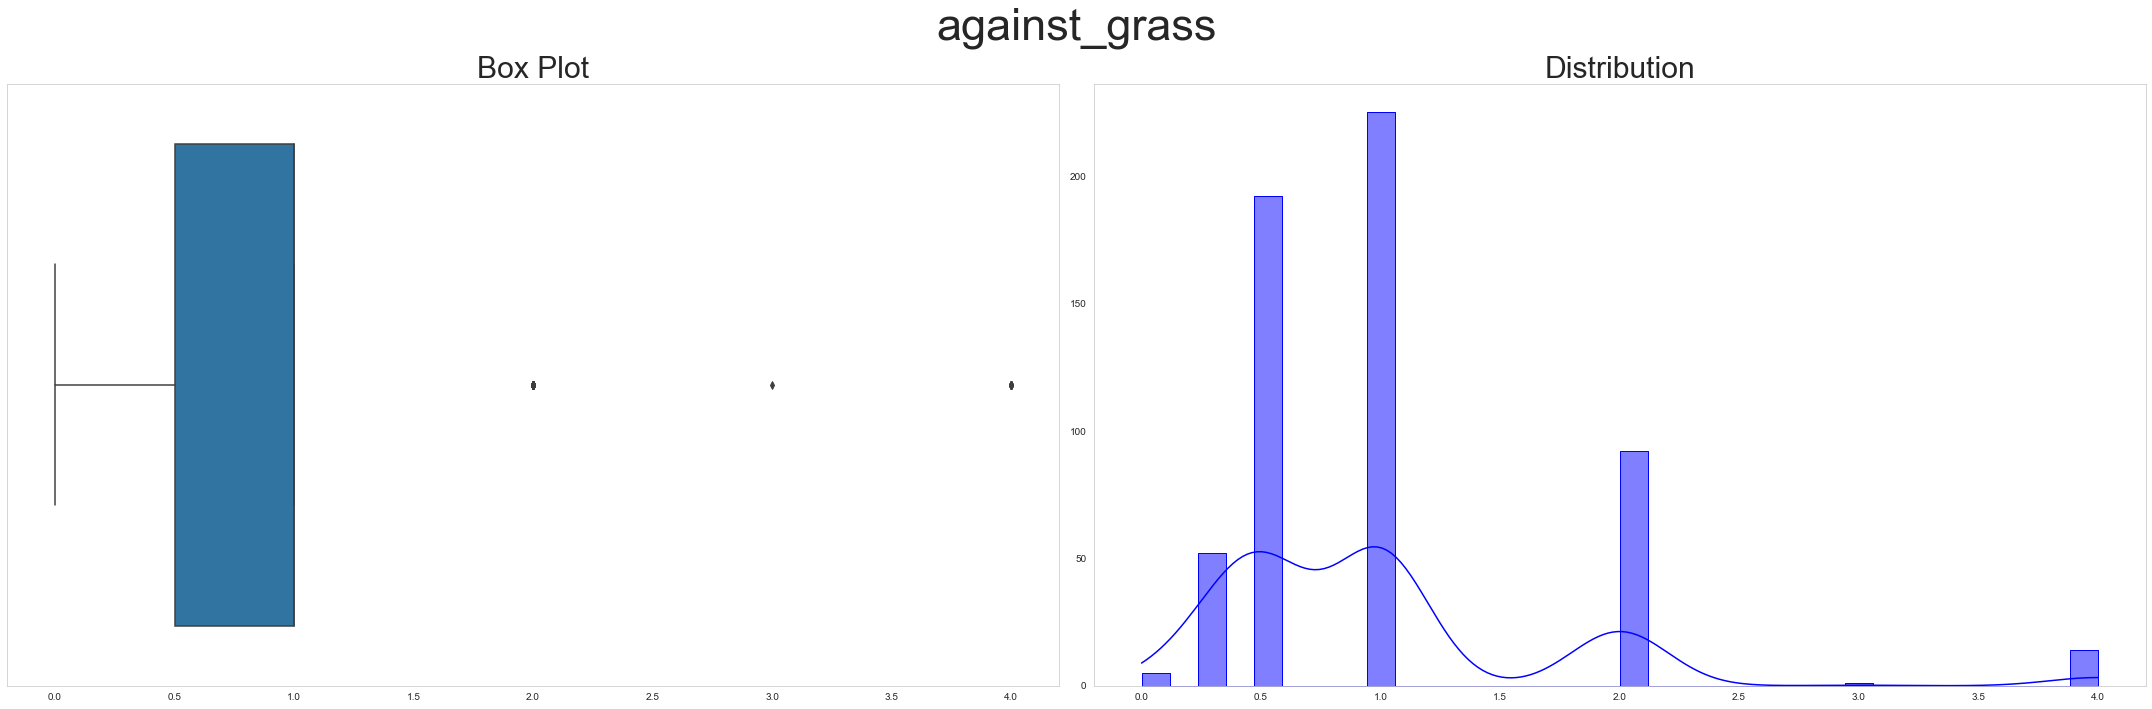

Summary Statistics for against_grass
count    581.000000
mean       0.993115
std        0.724239
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_grass, dtype: float64


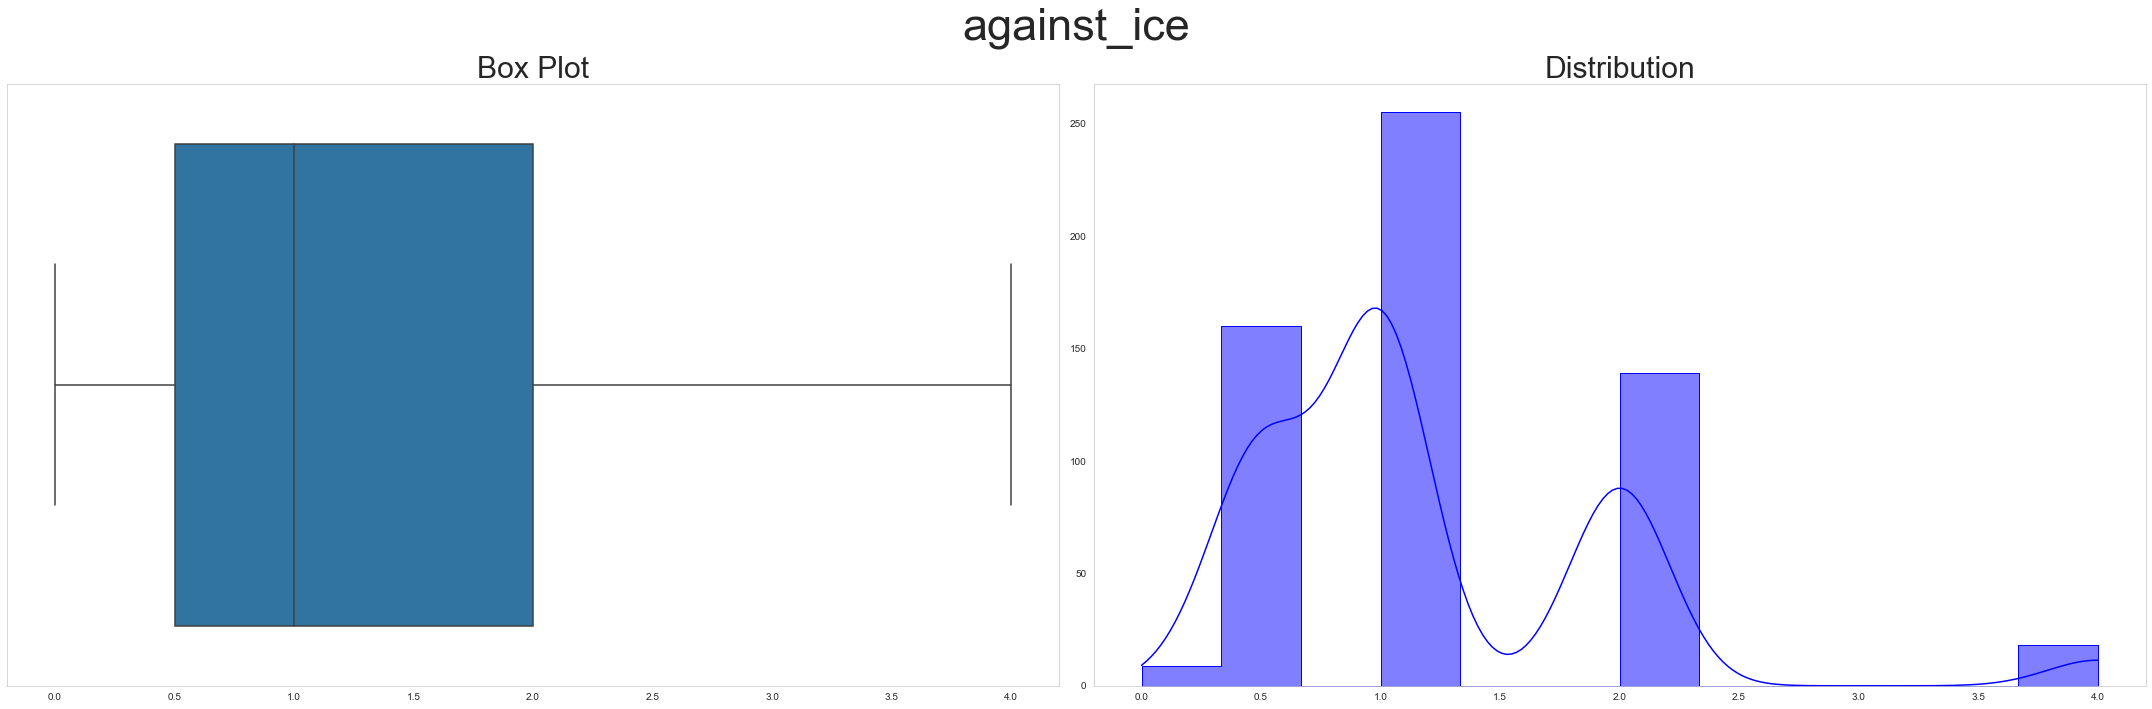

Summary Statistics for against_ice
count    581.000000
mean       1.182444
std        0.751046
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        4.000000
Name: against_ice, dtype: float64


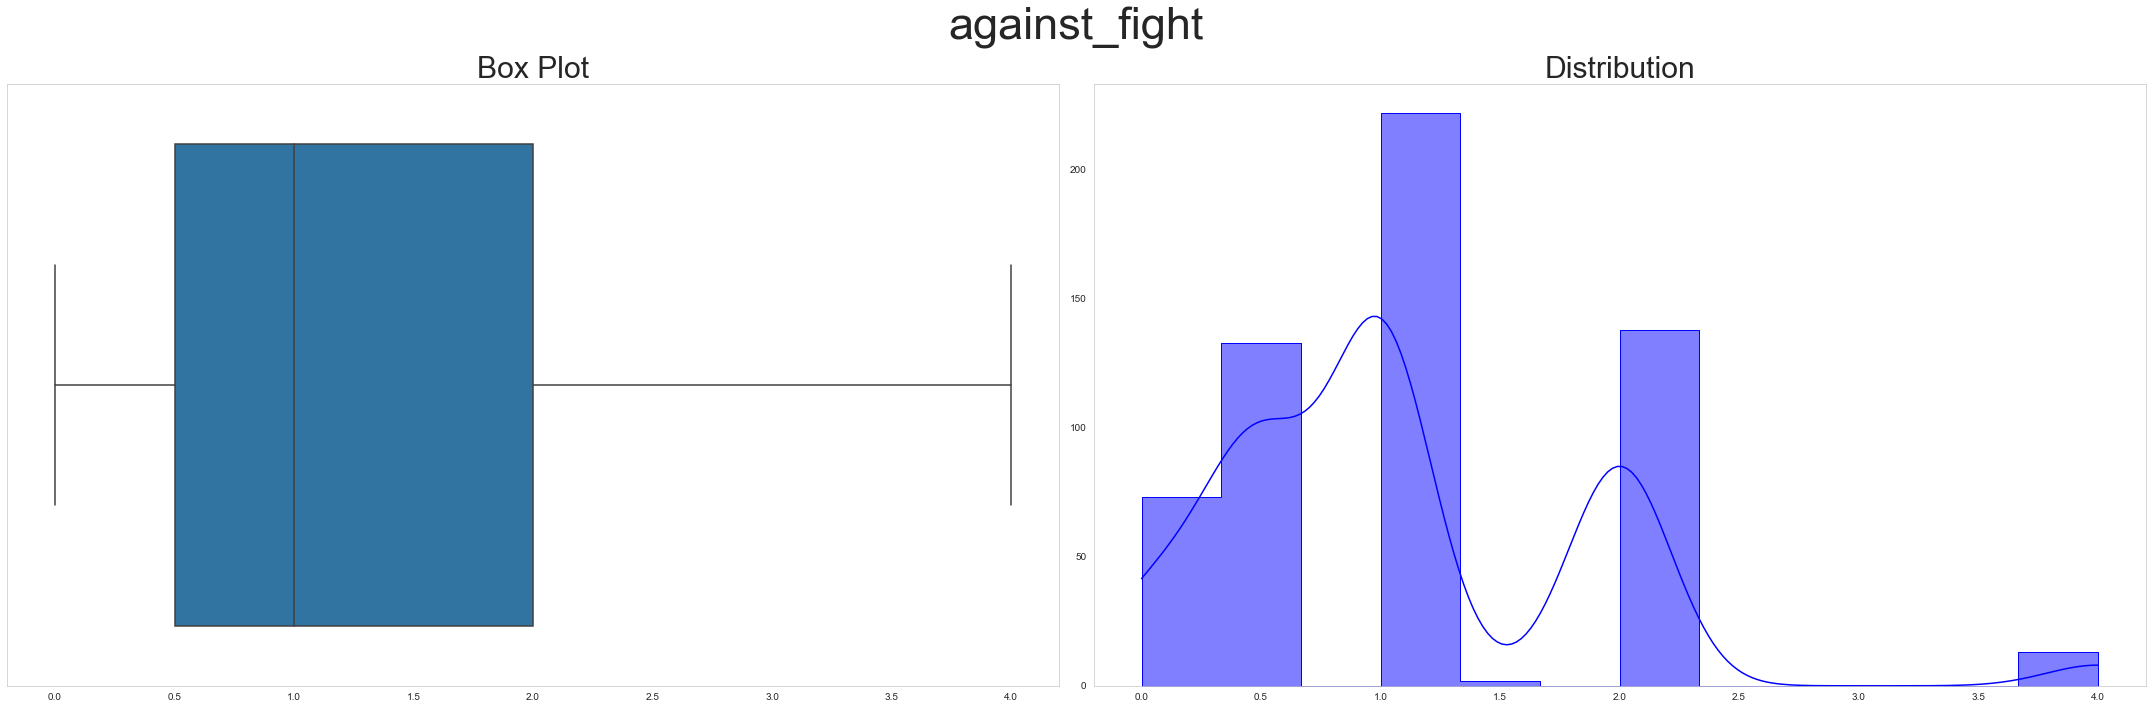

Summary Statistics for against_fight
count    581.000000
mean       1.079174
std        0.771232
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        4.000000
Name: against_fight, dtype: float64


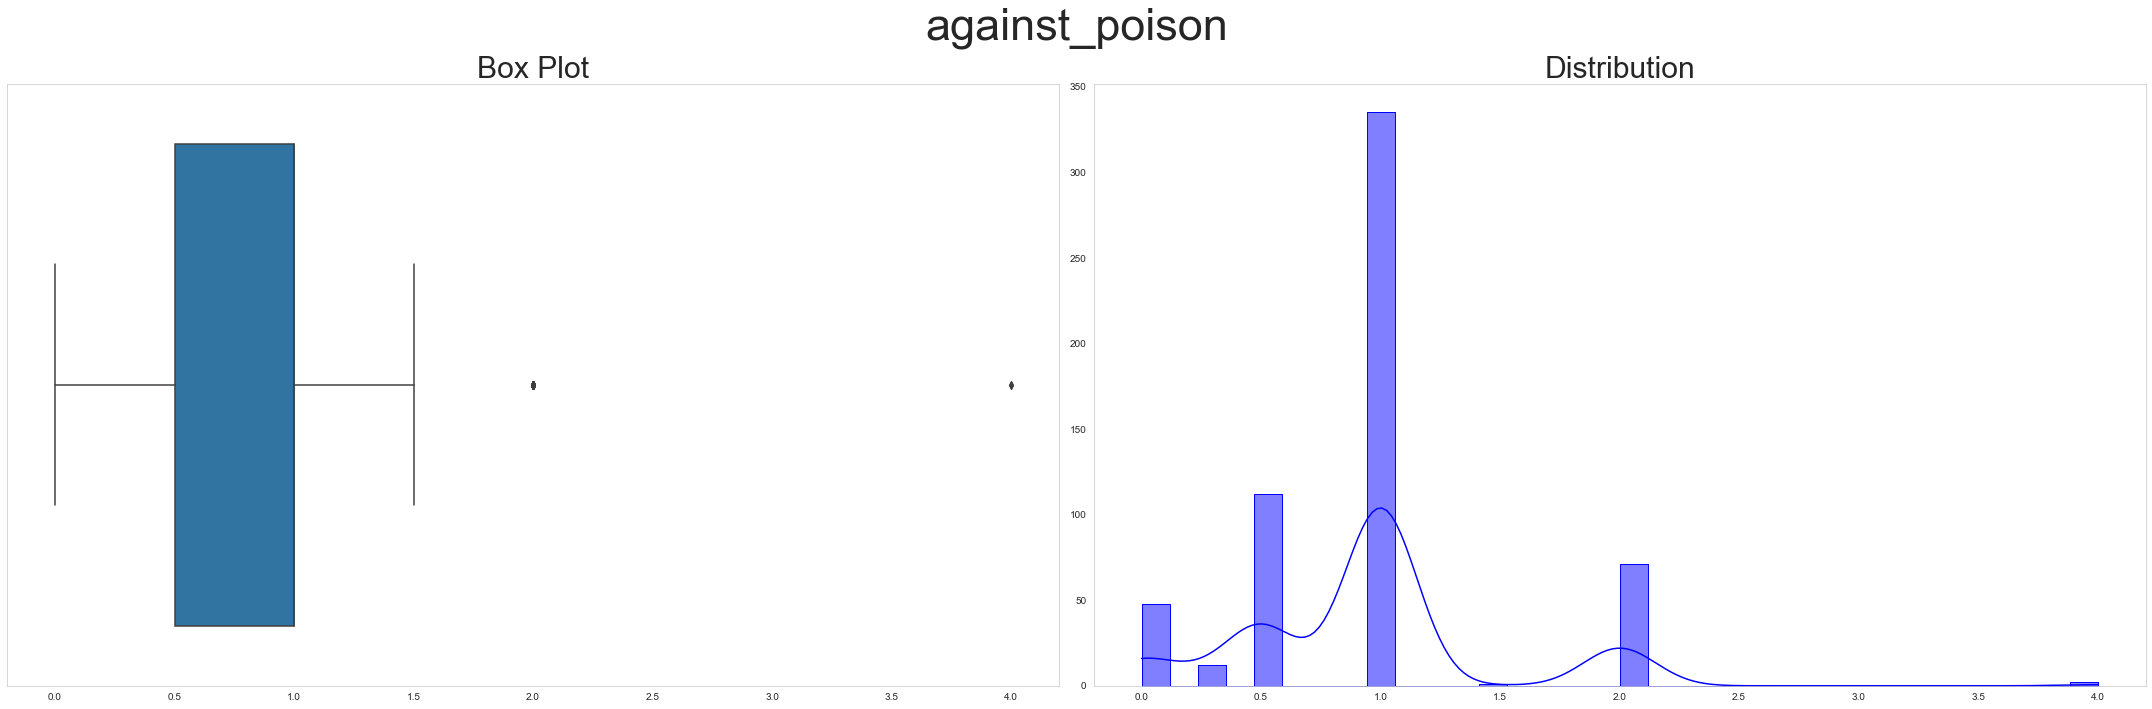

Summary Statistics for against_poison
count    581.000000
mean       0.938898
std        0.541121
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_poison, dtype: float64


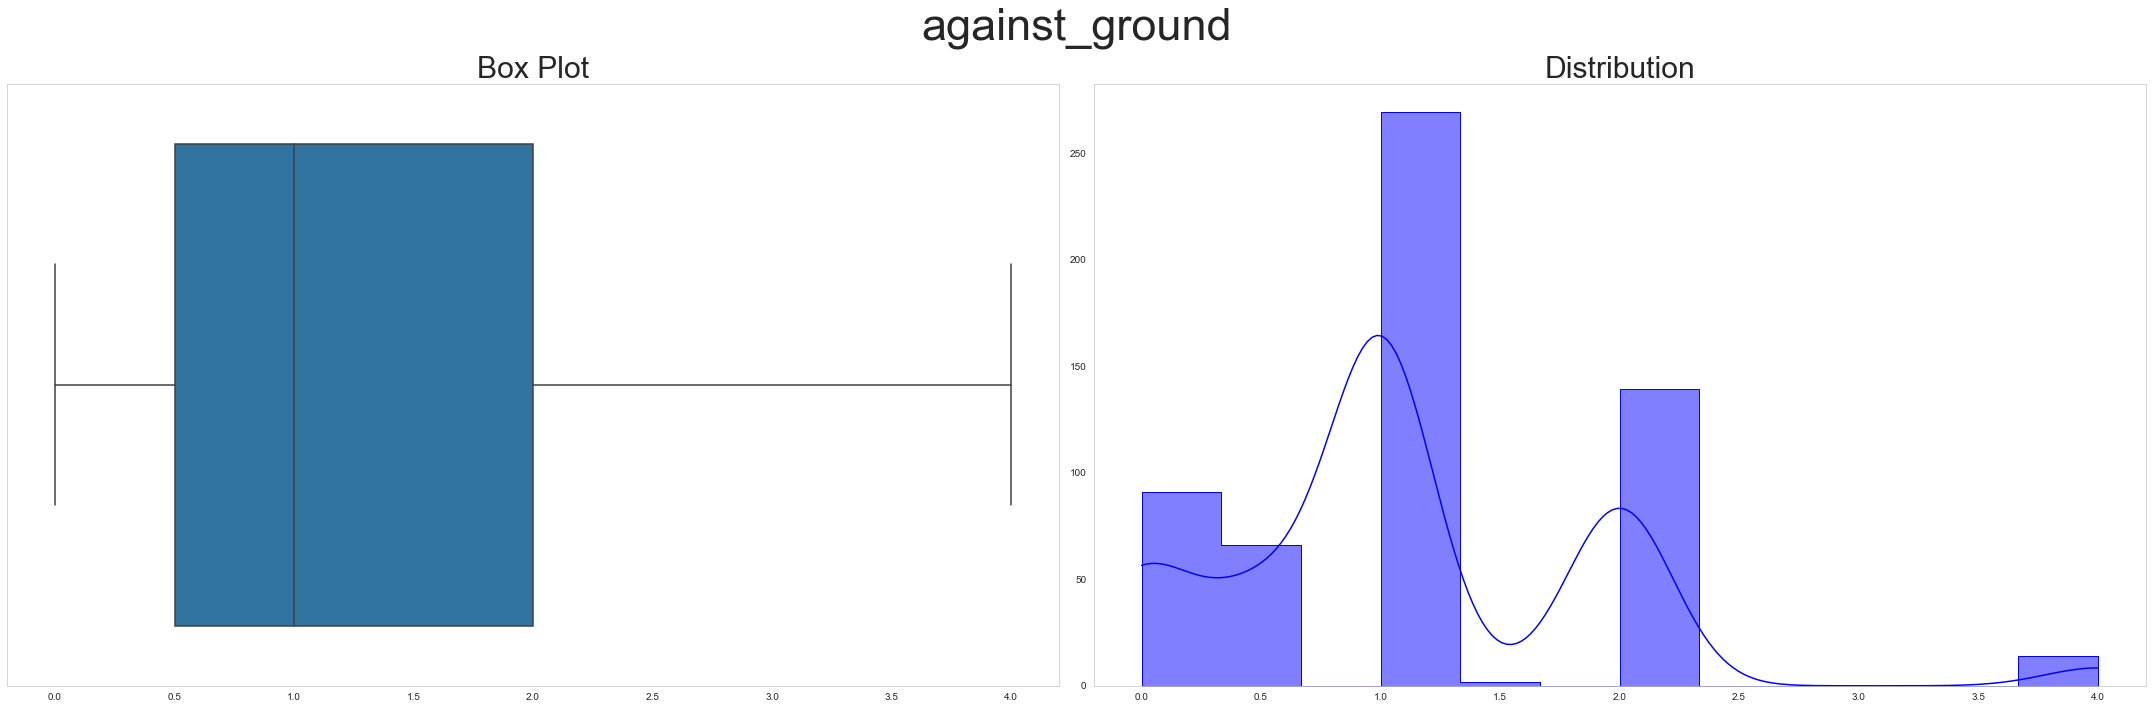

Summary Statistics for against_ground
count    581.000000
mean       1.101549
std        0.793572
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        4.000000
Name: against_ground, dtype: float64


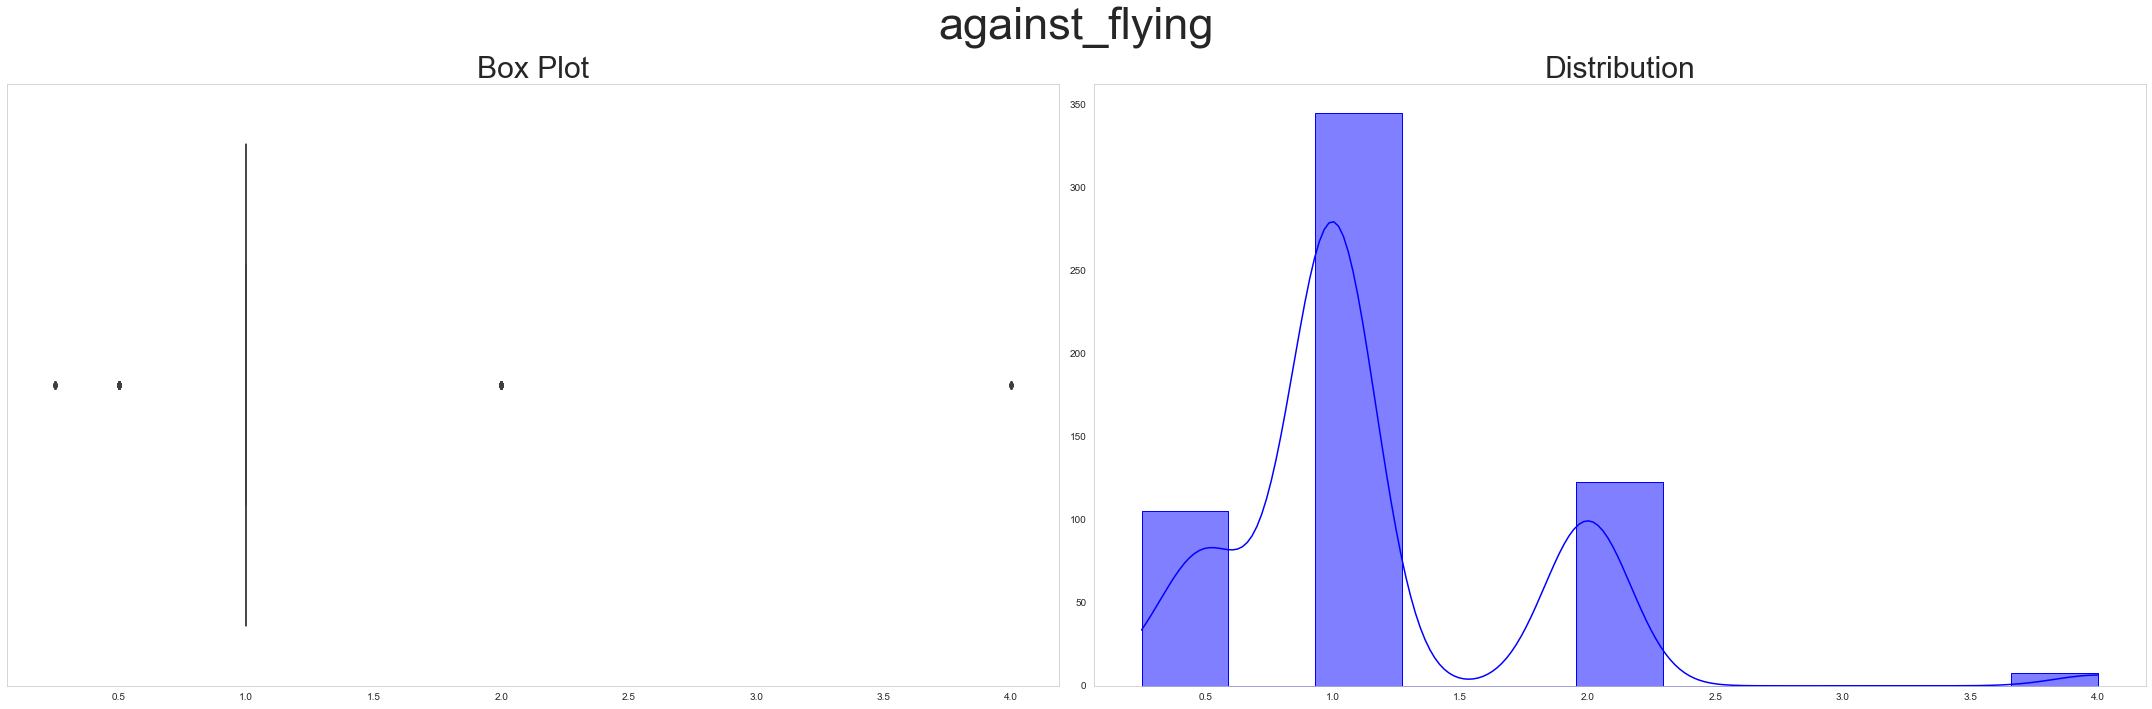

Summary Statistics for against_flying
count    581.000000
mean       1.158348
std        0.601445
min        0.250000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_flying, dtype: float64


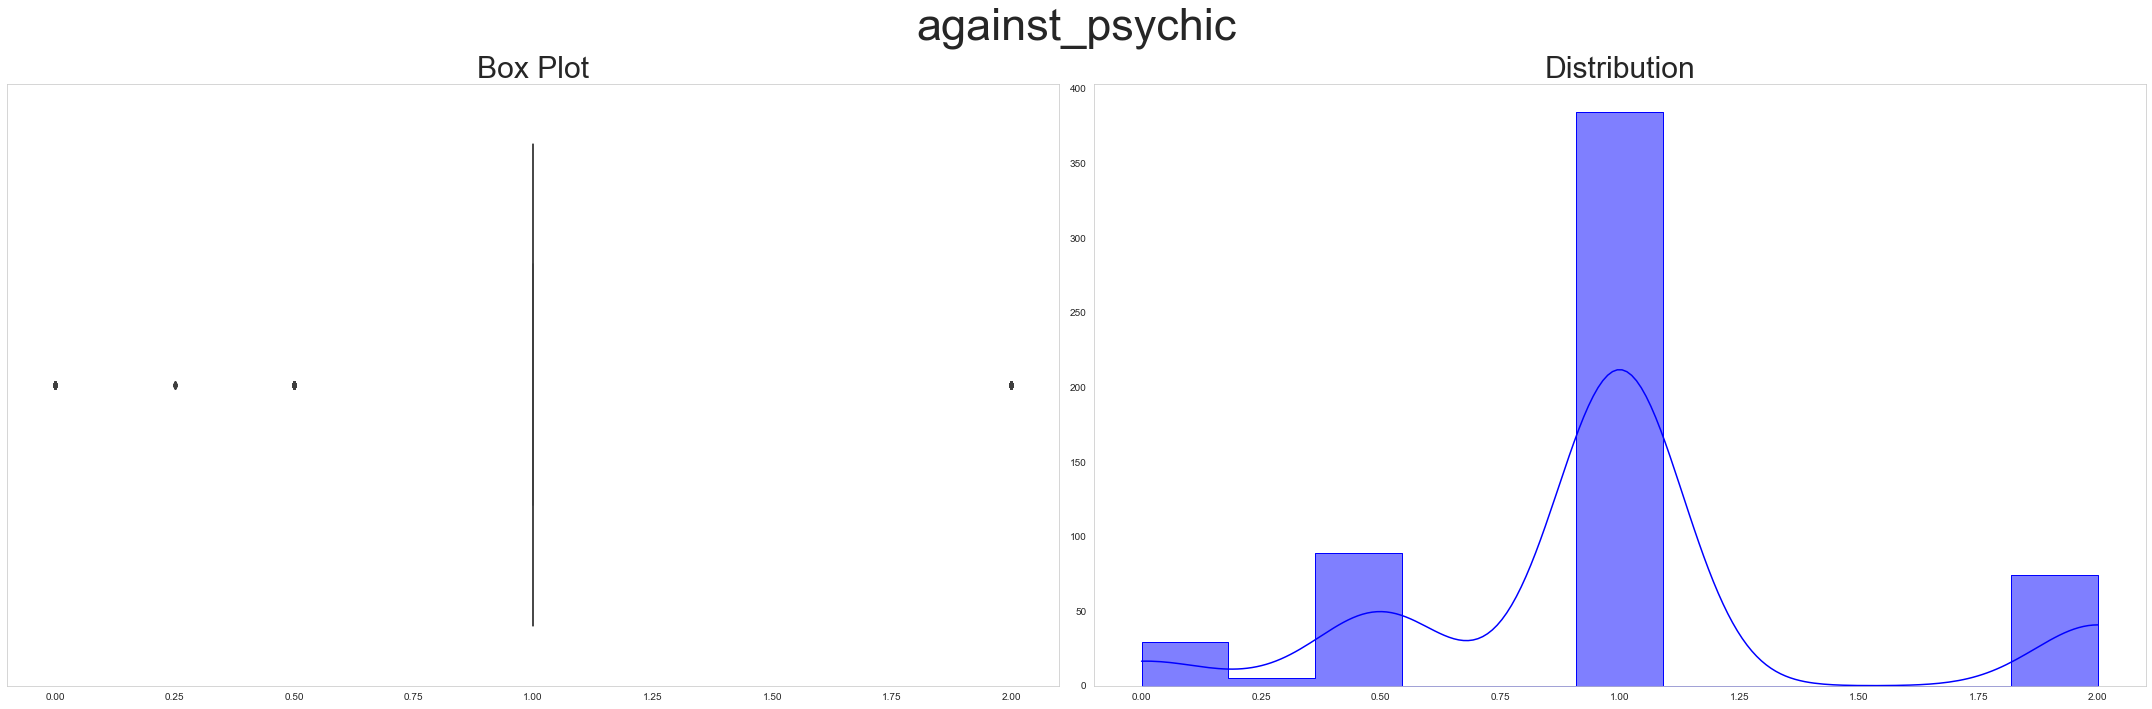

Summary Statistics for against_psychic
count    581.000000
mean       0.994406
std        0.469857
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: against_psychic, dtype: float64


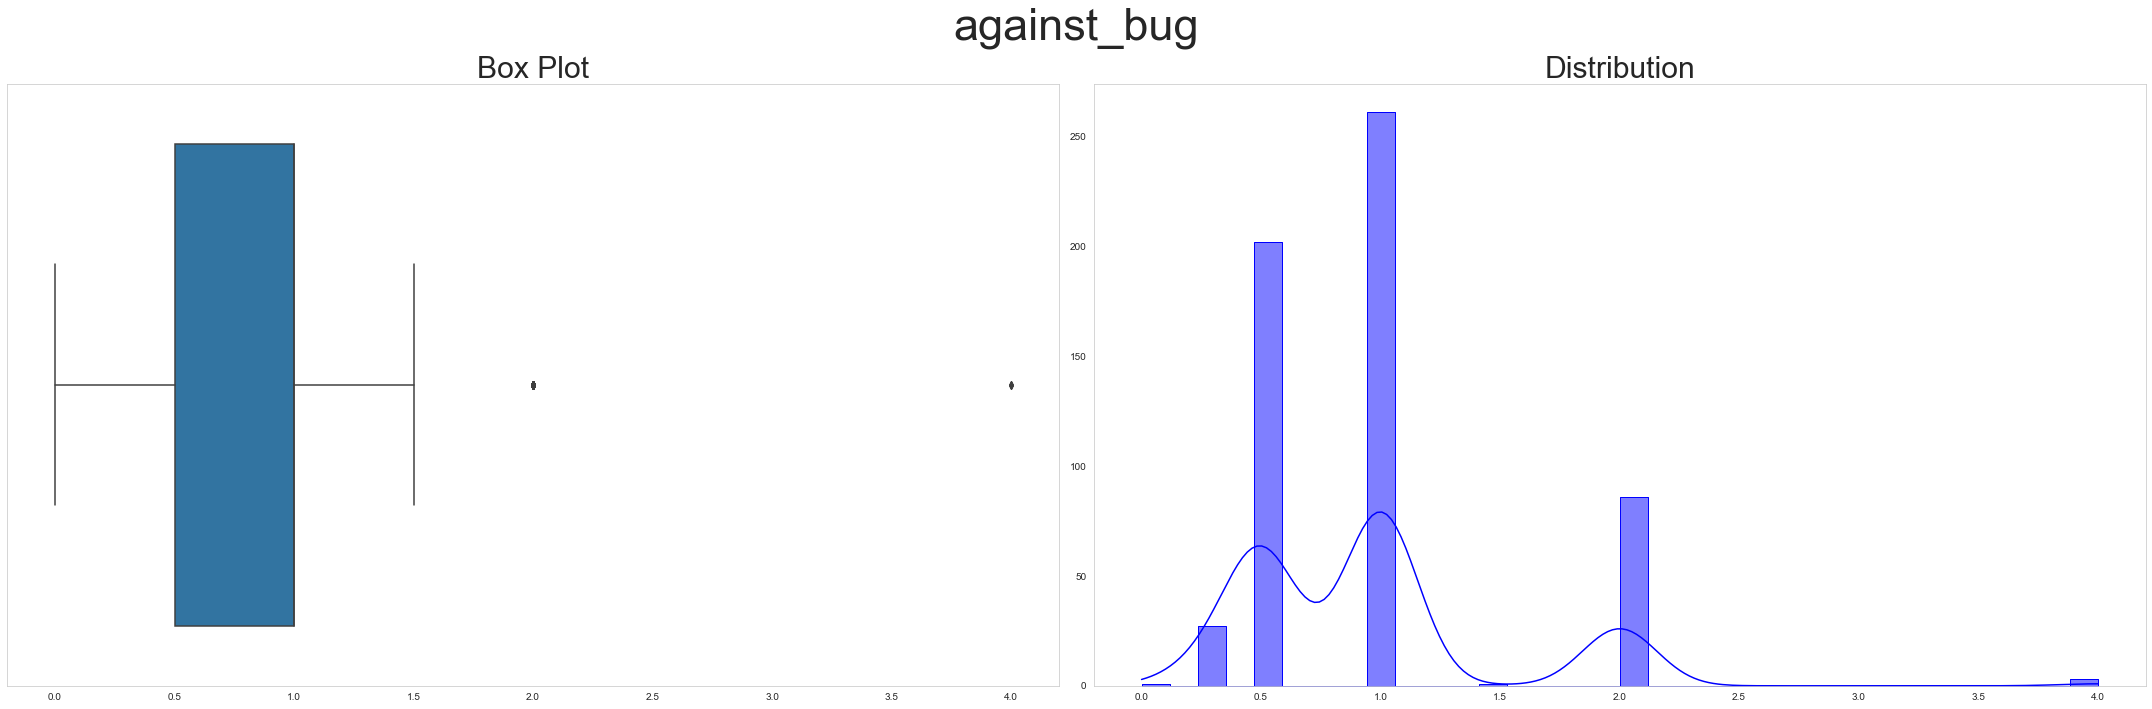

Summary Statistics for against_bug
count    581.000000
mean       0.953959
std        0.555080
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_bug, dtype: float64


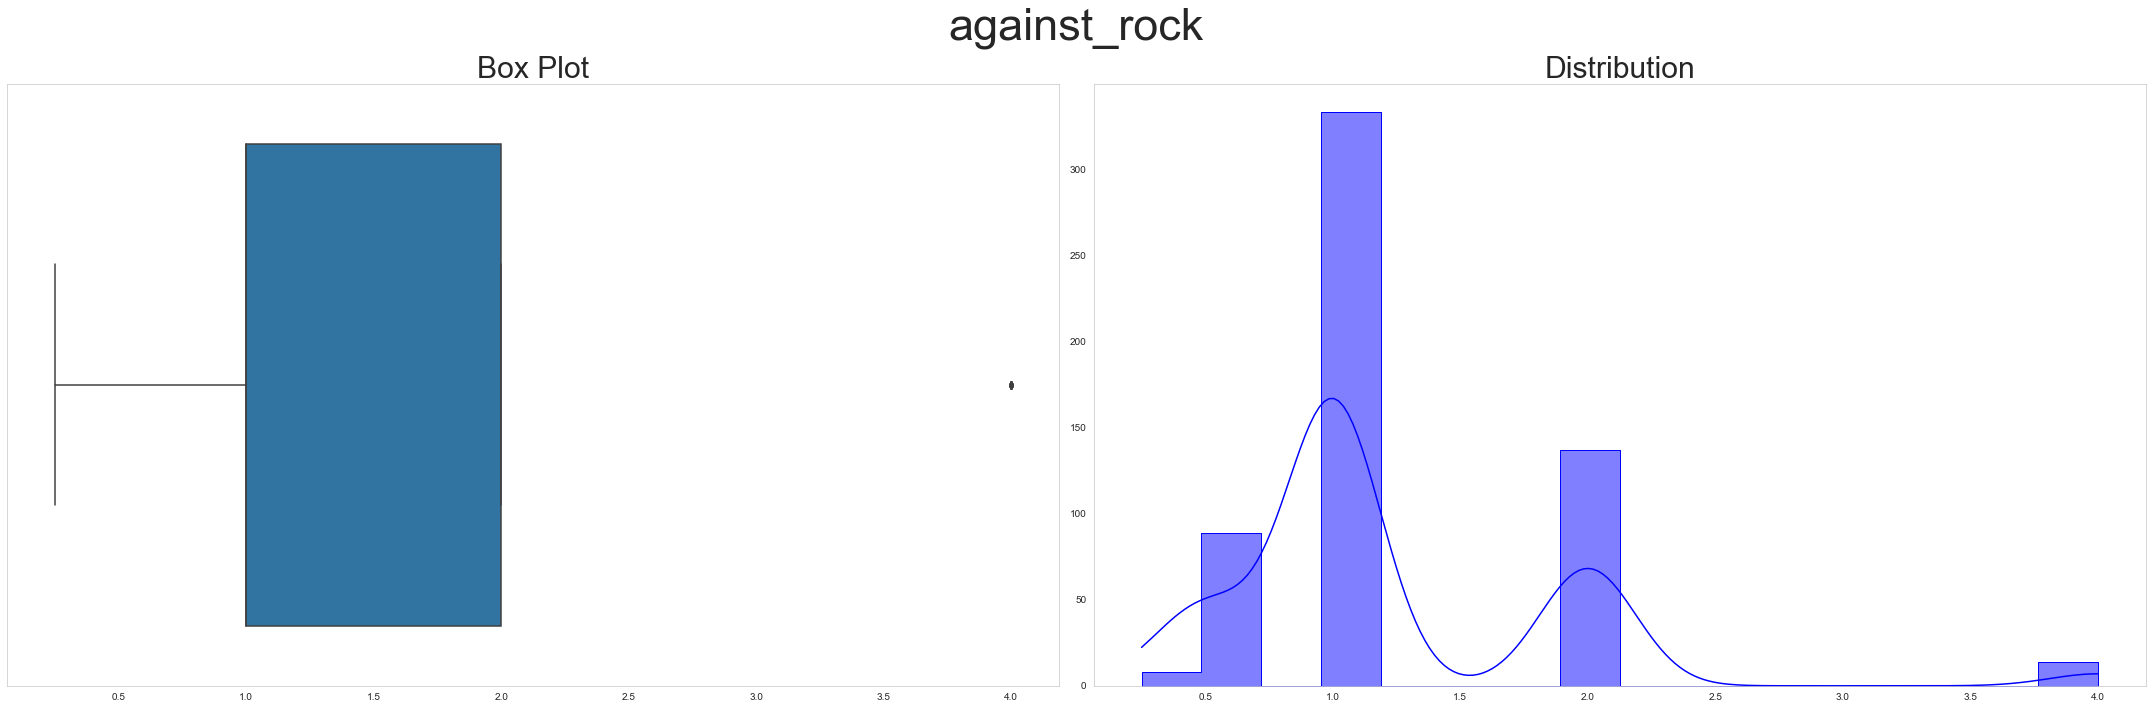

Summary Statistics for against_rock
count    581.000000
mean       1.221170
std        0.671244
min        0.250000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: against_rock, dtype: float64


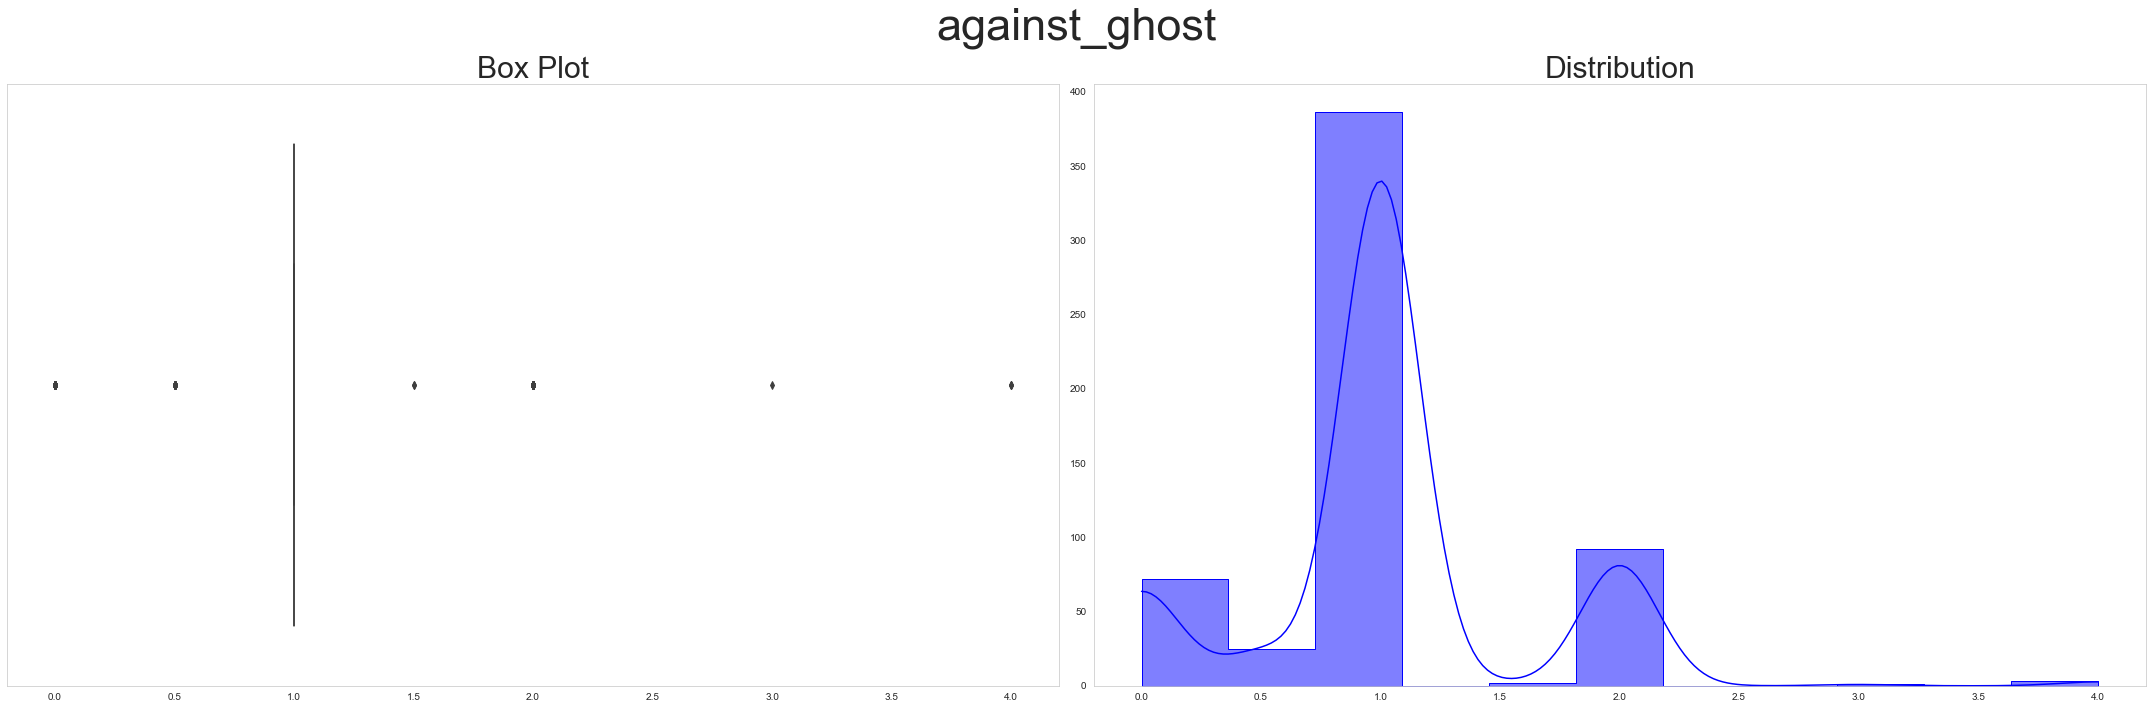

Summary Statistics for against_ghost
count    581.000000
mean       1.033563
std        0.588826
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_ghost, dtype: float64


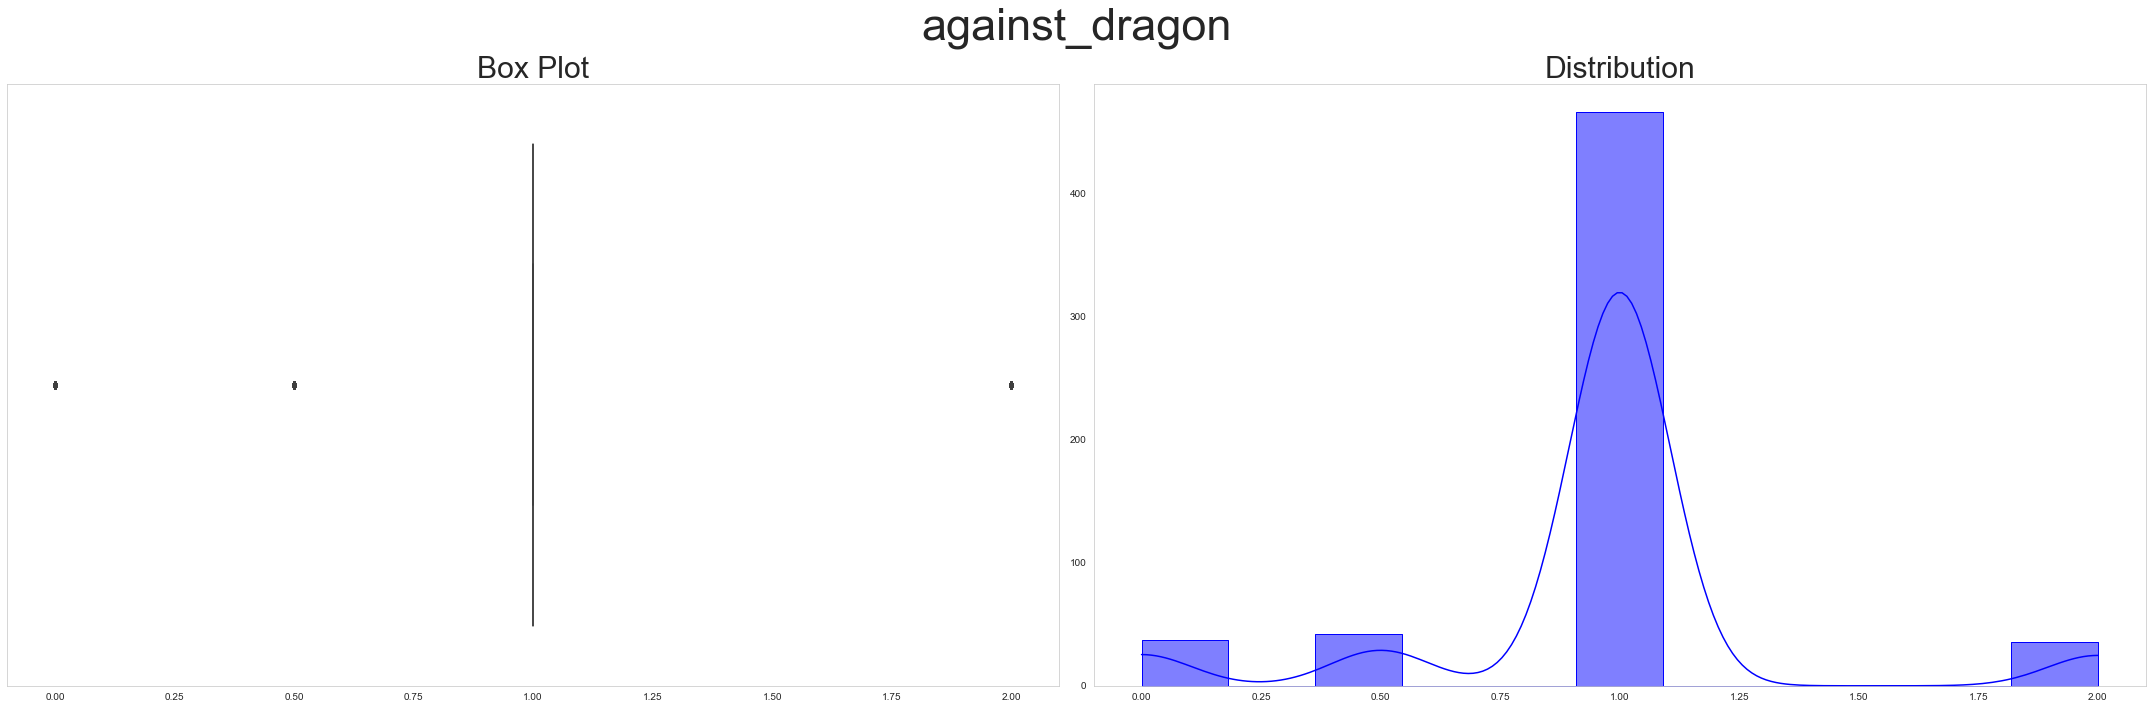

Summary Statistics for against_dragon
count    581.000000
mean       0.962134
std        0.377530
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: against_dragon, dtype: float64


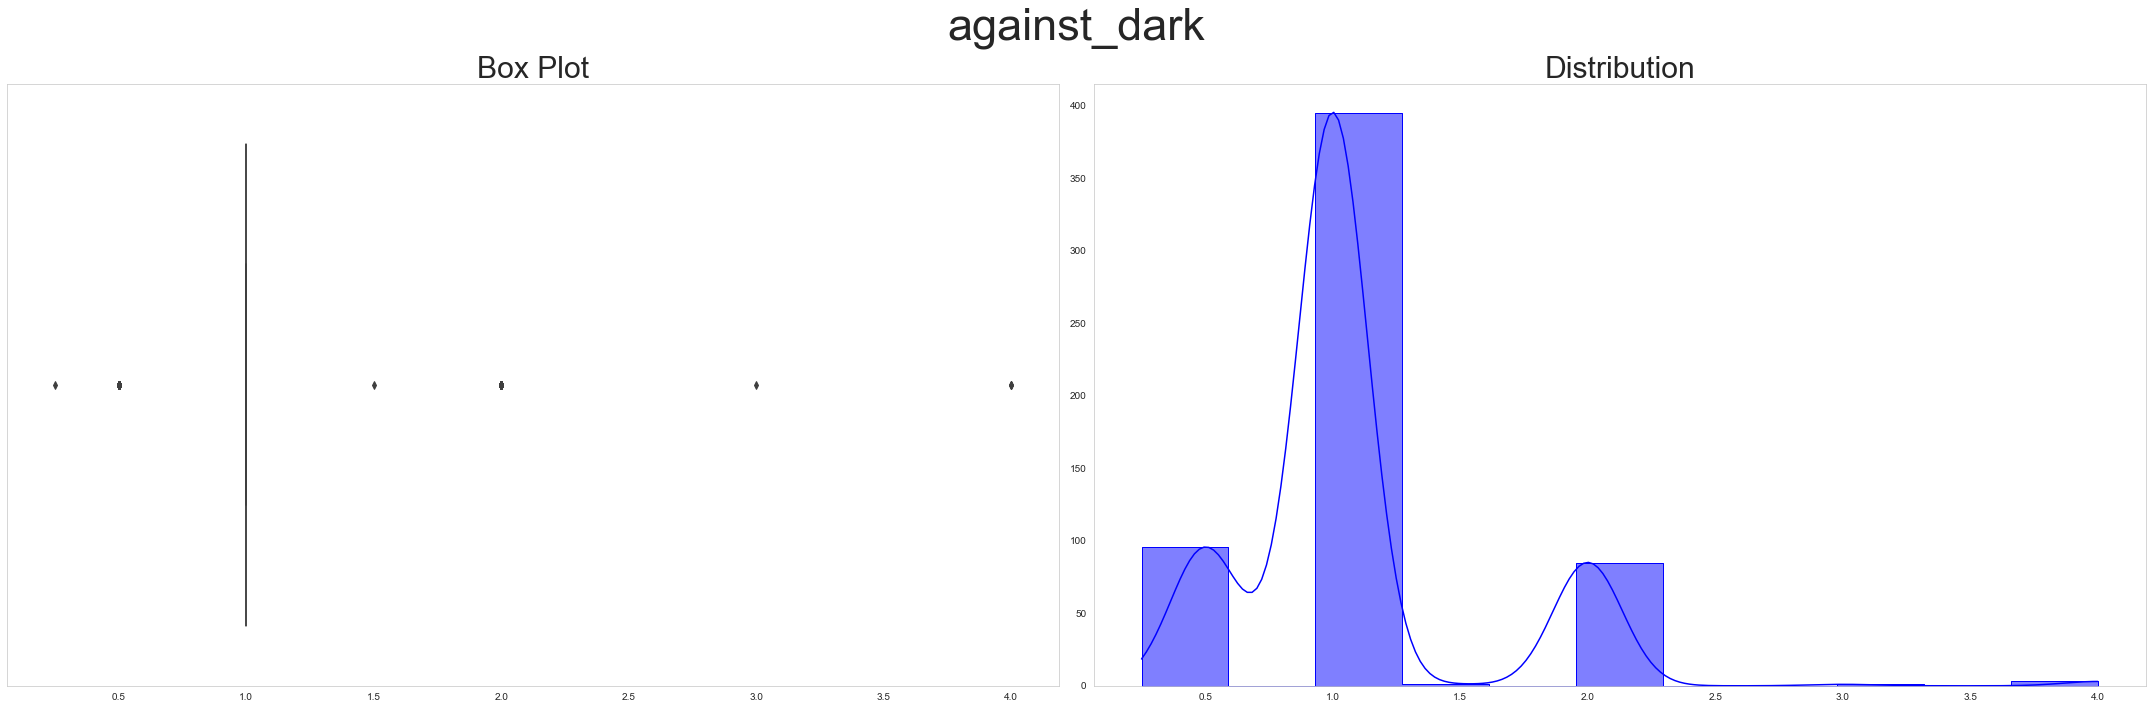

Summary Statistics for against_dark
count    581.000000
mean       1.083046
std        0.485222
min        0.250000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_dark, dtype: float64


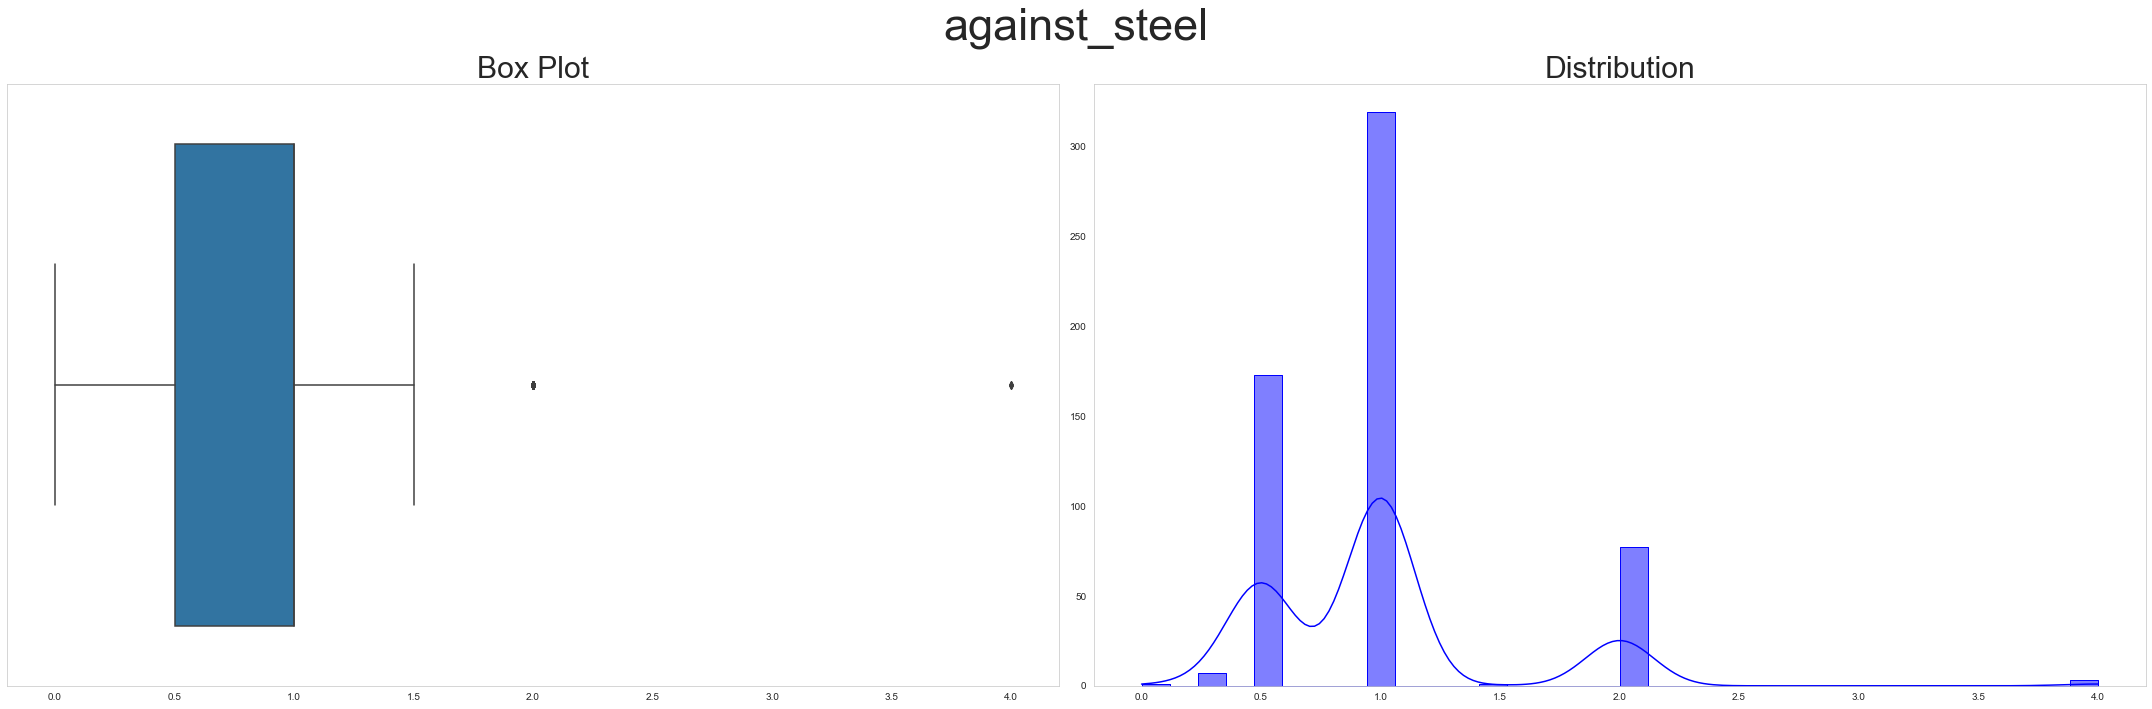

Summary Statistics for against_steel
count    581.000000
mean       0.989243
std        0.512550
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_steel, dtype: float64


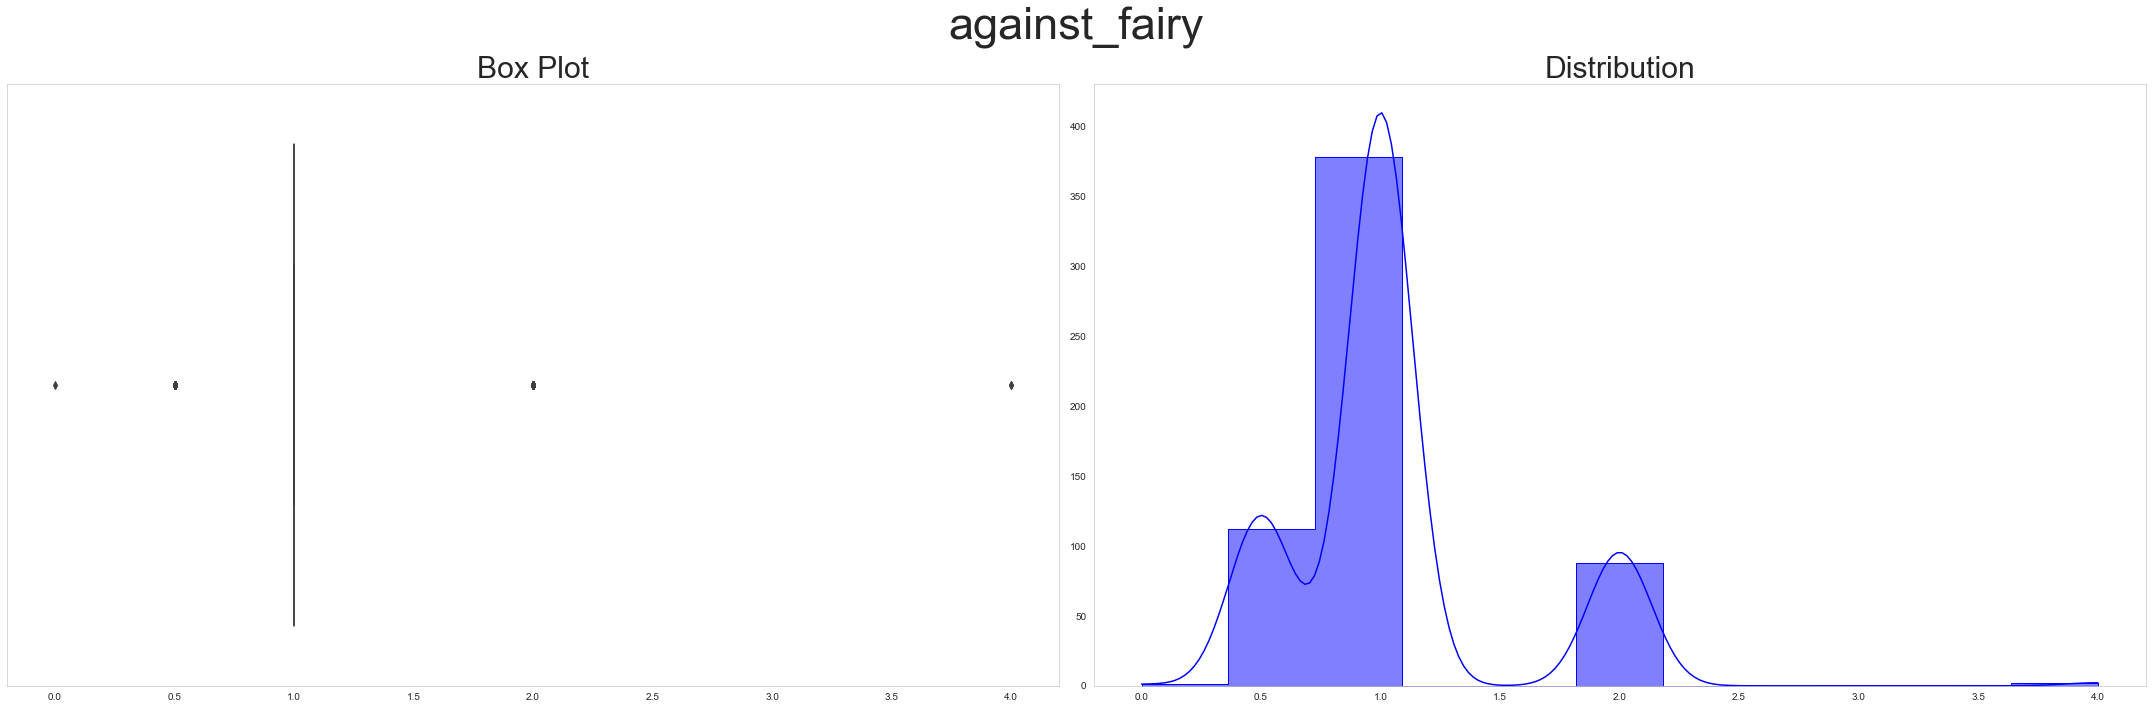

Summary Statistics for against_fairy
count    581.000000
mean       1.063683
std        0.478222
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: against_fairy, dtype: float64


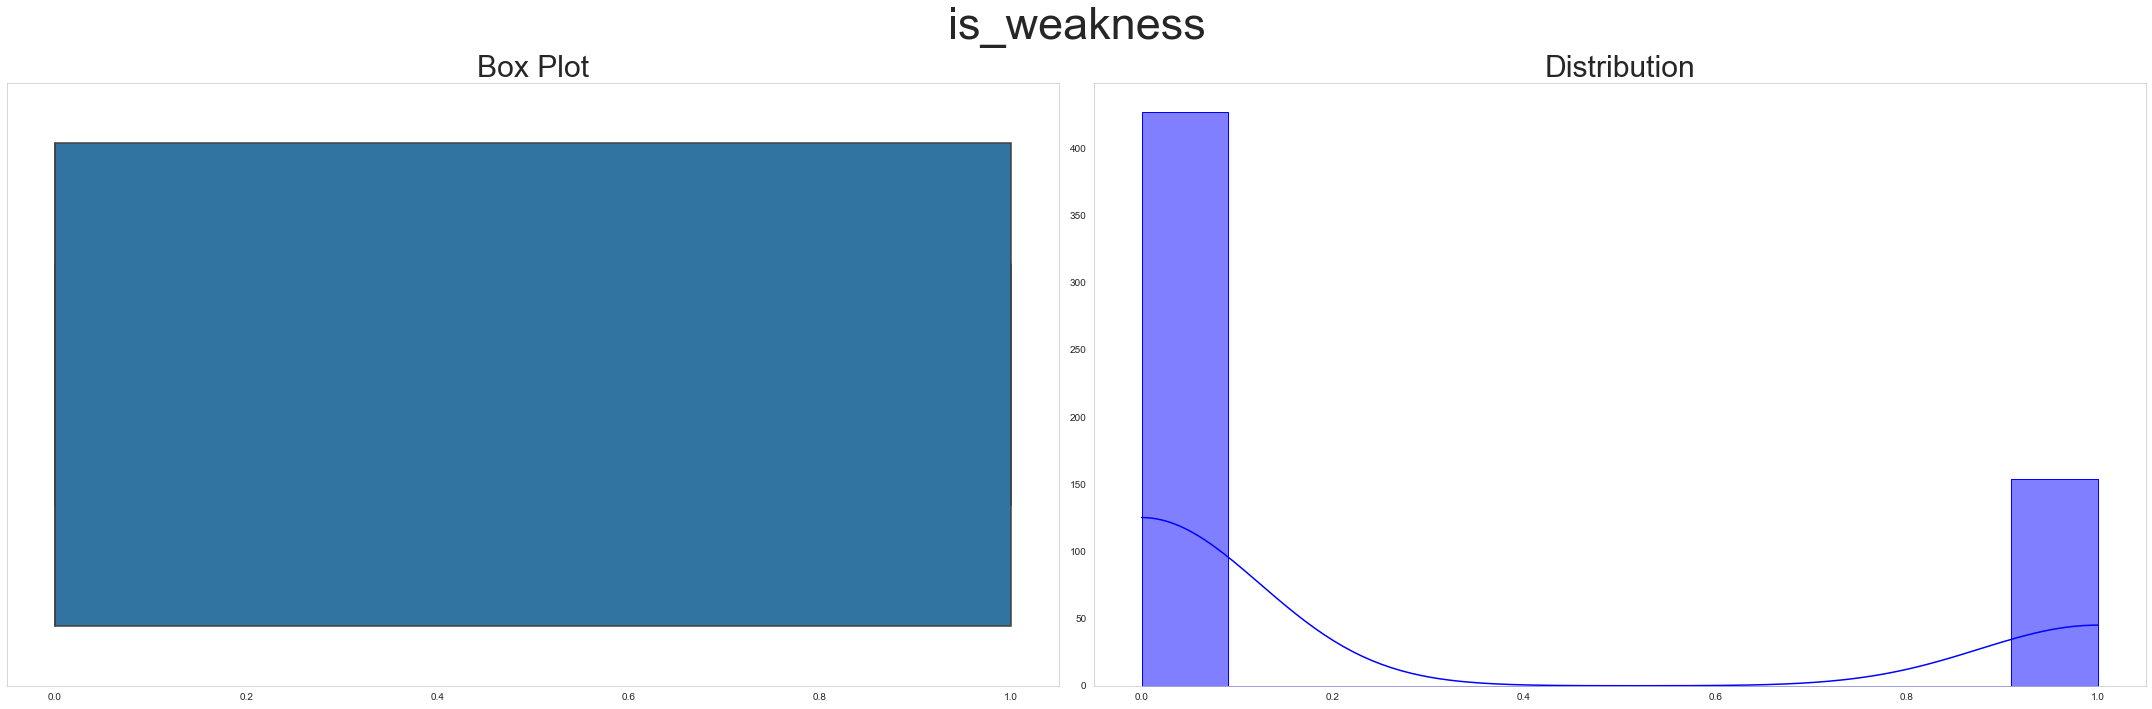

Summary Statistics for is_weakness
count    581.000000
mean       0.265060
std        0.441746
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: is_weakness, dtype: float64


In [52]:
univariate_stuff = train.columns[22:]

for i in univariate_stuff:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

In [53]:
def get_pokemon_heatmap(df):
    '''returns a beautiful heatmap with correlations'''
    plt.figure(figsize=(8,12))
    poke_heatmap = sns.heatmap(df.corr()[['is_weakness']].sort_values(by='is_weakness', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='seismic')
    poke_heatmap.set_title('Features Correlated with Scorbunny\'s Weakness')
    return poke_heatmap

<AxesSubplot:title={'center':"Features Correlated with Scorbunny's Weakness"}>

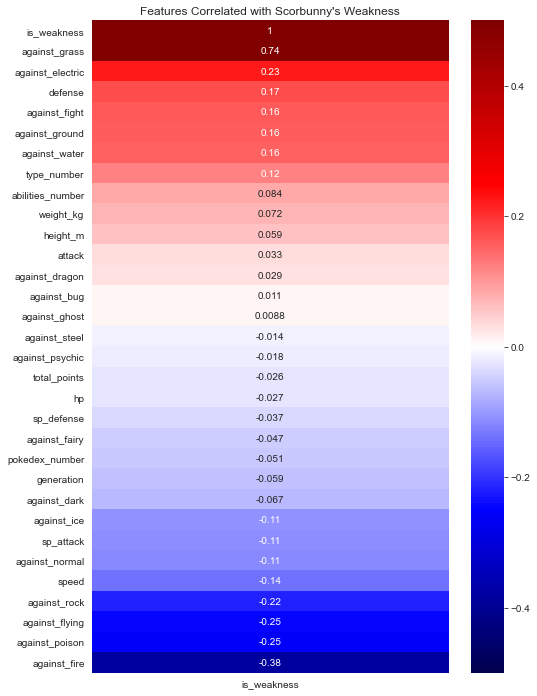

In [54]:
get_pokemon_heatmap(train)

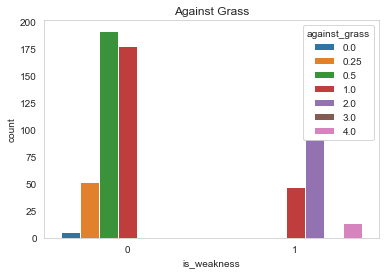

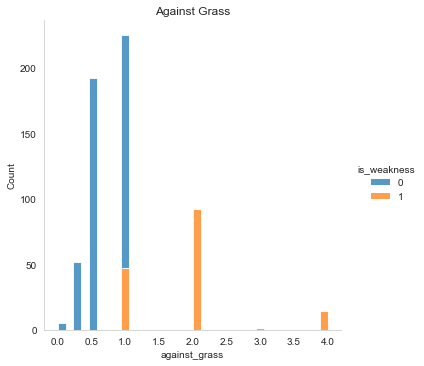

In [55]:

plt.subplots()
sns.countplot(data=train, hue='against_grass' , x = 'is_weakness') 
plt.title('Against Grass')
plt.show()


sns.displot(train, x='against_grass', hue = 'is_weakness', multiple= 'stack')
plt.title('Against Grass')
plt.show()

In [56]:
# def count_and_displots(df, variable, target):
#     plt.figure(figsize=(30,10))
#     #sns.set(font_scale = 2)
#     sns.set_style("whitegrid", {'axes.grid' : False})
#     # boxplot
#     plt.subplot(121)
#     sns.countplot(data=df, hue=variable, x=target)
#     plt.xlabel(f'{target}')
    
#     # distribution
#     plt.subplot(122)
#     sns.displot(data=df, x=variable, hue=target, multiple='stack')
#     plt.xlabel(f'{target}')
#     plt.ylabel('')
#     #title
# # #     plt.suptitle(f'{variable}', fontsize = 45)
#     #plt.tight_layout()
#     plt.show()

In [57]:
# count_and_displots(train,'against_grass','is_weakness')

In [58]:
def count_and_histplots(df, variable, target):
        fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(16,7))
        sns.countplot(data=df, hue=variable, x=target, ax=ax1)
        sns.histplot(data=df, x=variable, hue=target, multiple='stack', ax=ax2)
        plt.show()

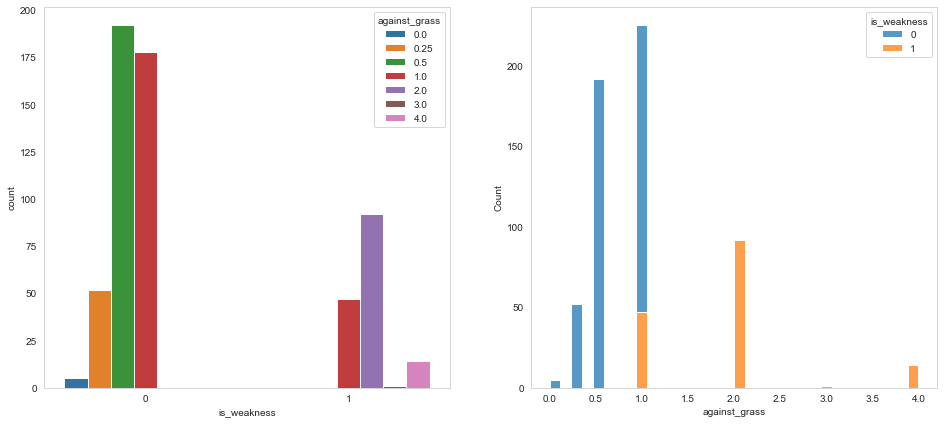

In [59]:
count_and_histplots(train, 'against_grass','is_weakness')

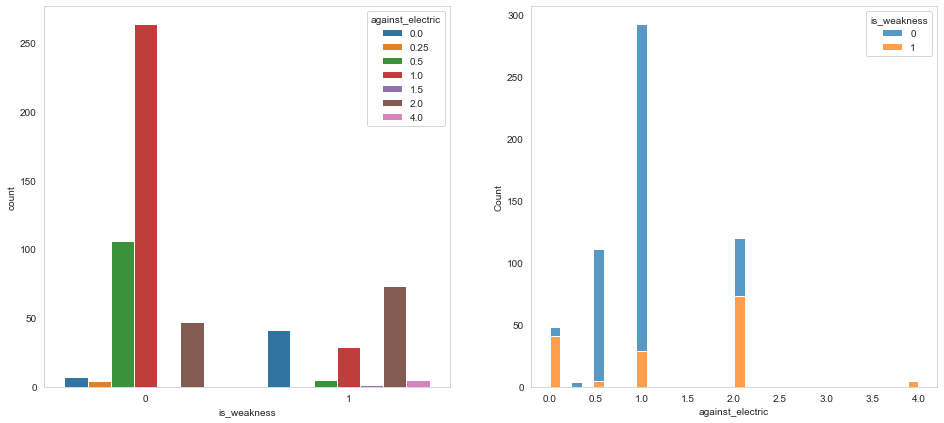

In [60]:
count_and_histplots(train, 'against_electric','is_weakness')

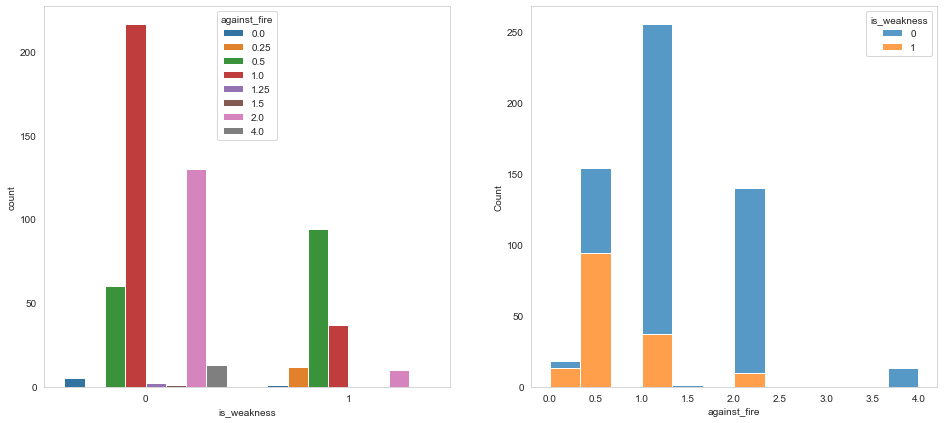

In [61]:
count_and_histplots(train, 'against_fire','is_weakness')

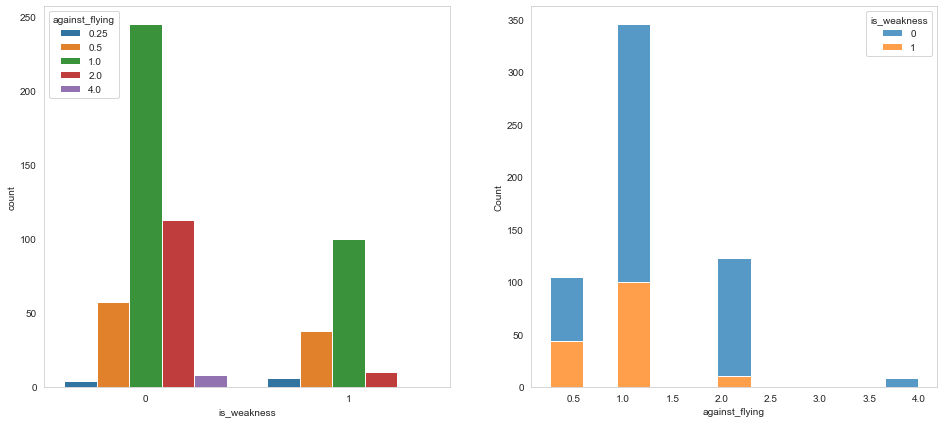

In [62]:
count_and_histplots(train, 'against_flying','is_weakness')

In [63]:
train.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'species',
       'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'growth_rate', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy',
       'is_weakness'],
      dtype='object')

Text(0.5, 1.0, 'Weight and Weakness')

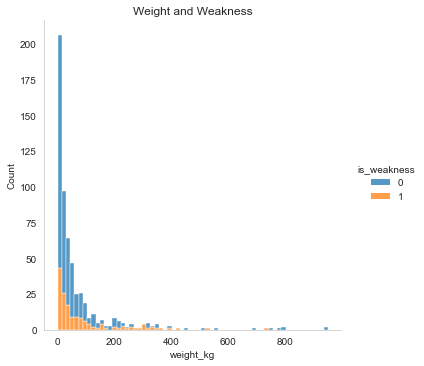

In [64]:
sns.displot(train, x="weight_kg",hue="is_weakness", multiple='stack')
plt.title('Weight and Weakness')

Text(0.5, 1.0, 'Weight and Weakness')

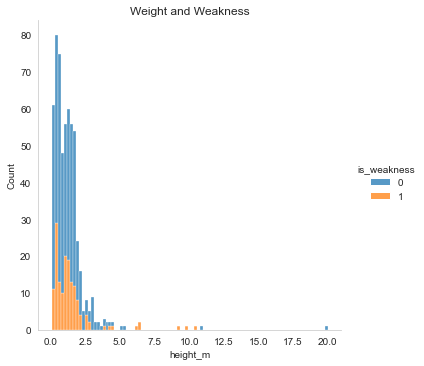

In [65]:
sns.displot(train, x="height_m",hue="is_weakness", multiple='stack')
plt.title('Weight and Weakness')

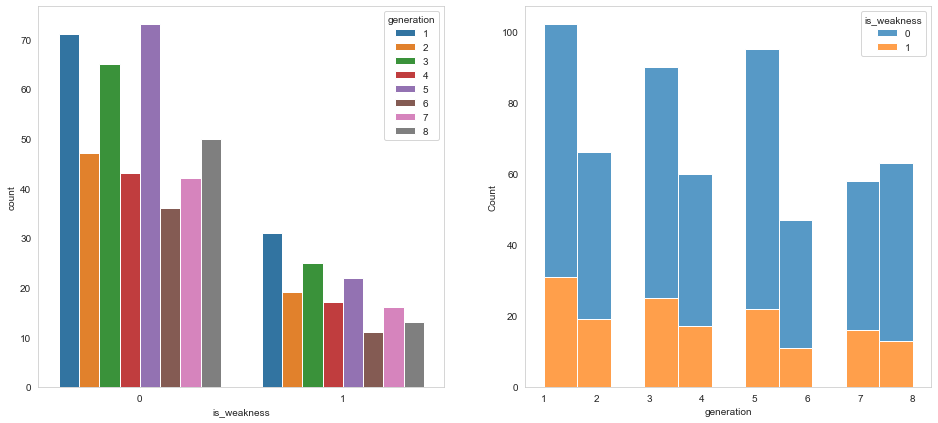

In [66]:
count_and_histplots(train, 'generation','is_weakness')

In [67]:
train.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'species',
       'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'growth_rate', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy',
       'is_weakness'],
      dtype='object')

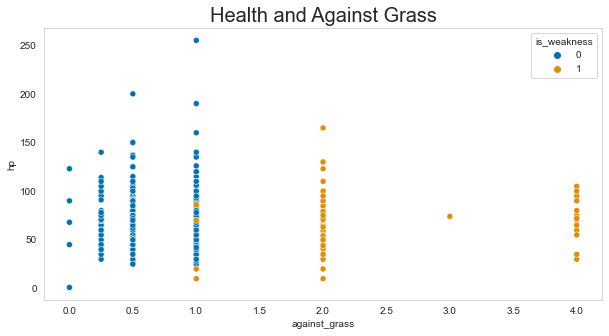

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='against_grass',y='hp',data=train,hue='is_weakness', palette='colorblind')
plt.title('Health and Against Grass', fontsize = 20)
plt.show()

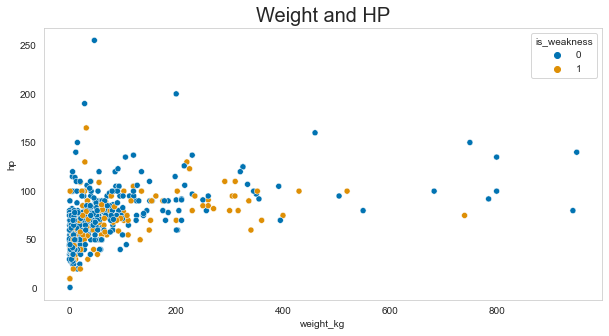

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='weight_kg',y='hp',data=train,hue='is_weakness', palette='colorblind')
plt.title('Weight and HP', fontsize = 20)
plt.show()

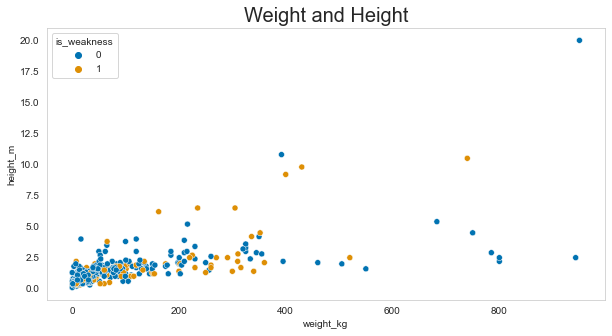

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='weight_kg',y='height_m',data=train,hue='is_weakness', palette='colorblind')
plt.title('Weight and Height', fontsize = 20)
plt.show()

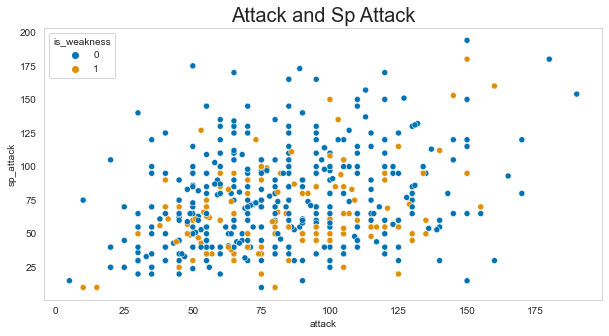

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='attack',y='sp_attack',data=train,hue='is_weakness', palette='colorblind')
plt.title('Attack and Sp Attack', fontsize = 20)
plt.show()

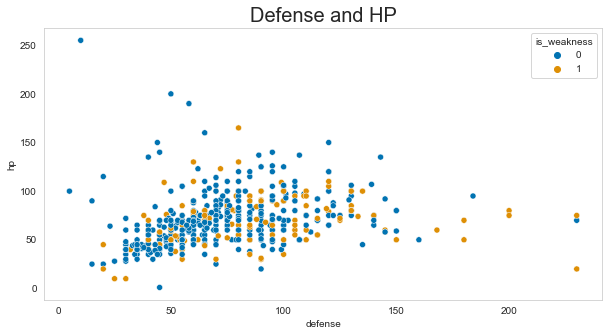

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='defense',y='hp',data=train,hue='is_weakness', palette='colorblind')
plt.title('Defense and HP', fontsize = 20)
plt.show()

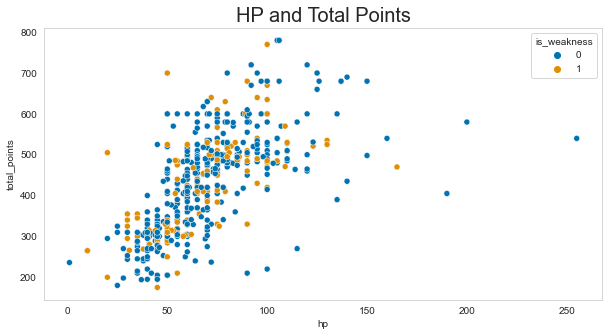

In [93]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='hp',y='total_points',data=train,hue='is_weakness', palette='colorblind')
plt.title('HP and Total Points', fontsize = 20)
plt.show()

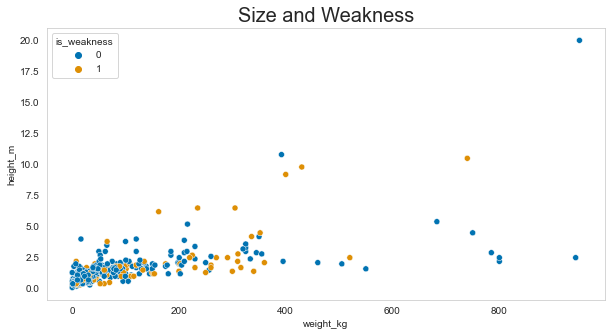

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='weight_kg',y='height_m',data=train,hue='is_weakness', palette='colorblind')
plt.title('Size and Weakness', fontsize = 20)
plt.show()

In [74]:
train['against_grass_bins'] = pd.cut(train.against_grass, [0,2,5], right=False)
train.against_grass_bins.value_counts()

[0, 2)    474
[2, 5)    107
Name: against_grass_bins, dtype: int64

In [75]:
null_hypothesis =  "A Pokemon's inability to handle grass attacks and whether they are harmful to my Pokemon are independent"
alternative_hypothesis =  "A Pokemon's inability to handle grass attacks and whether they are harmful to my Pokemon are not independent"
a = 0.05 #a for alpha 

observed = pd.crosstab(train.against_grass_bins, train.is_weakness, margins = True)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')
p

Reject the null hypothesis, because there is evidence to suggest: A Pokemon's inability to handle grass attacks and whether they are harmful to my Pokemon are not independent


1.9747568127884762e-77

In [76]:
null_hypothesis =  "A Pokemon's inability to handle fire attacks and whether they are harmful to my Pokemon are independent"
alternative_hypothesis =  "A Pokemon's inability to handle fire attacks and whether they are harmful to my Pokemon are not independent"
a = 0.05 #a for alpha 

observed = pd.crosstab(train.against_fire, train.is_weakness, margins = True)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject the null hypothesis, because there is evidence to suggest: A Pokemon's inability to handle fire attacks and whether they are harmful to my Pokemon are not independent


In [77]:
null_hypothesis =  "A Pokemon's inability to handle electric attacks and whether they are harmful to my Pokemon are independent"
alternative_hypothesis =  "A Pokemon's inability to handle electric attacks and whether they are harmful to my Pokemon are not independent"
a = 0.05 #a for alpha 

observed = pd.crosstab(train.against_electric, train.is_weakness, margins = True)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject the null hypothesis, because there is evidence to suggest: A Pokemon's inability to handle electric attacks and whether they are harmful to my Pokemon are not independent


In [78]:
null_hypothesis =  "A Pokemon's inability to handle ghost attacks and whether they are harmful to my Pokemon are independent"
alternative_hypothesis =  "A Pokemon's inability to handle ghost attacks and whether they are harmful to my Pokemon are not independent"
a = 0.05 #a for alpha 

observed = pd.crosstab(train.against_ghost, train.is_weakness, margins = True)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject the null hypothesis, because there is evidence to suggest: A Pokemon's inability to handle ghost attacks and whether they are harmful to my Pokemon are not independent


Does HP have an affect on whether they'll be harmful to Scorbunny?

In [79]:
null_hypothesis = "HP and harm to Scorbunny are independent"
alternative_hypothesis = "HP and harm to Scorbunny are not independent"
a = 0.05 #a for alpha 

#this time we will be using a t test to compare means.
harmful = train[train.is_weakness==1]
friendly = train[train.is_weakness==0]

t, p = stats.ttest_ind(harmful.hp, friendly.hp)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Fail to reject null hypothesis that: HP and harm to Scorbunny are independent There is not sufficient evidence to reject it.


Does Speed have an affect on whether they'll be harmful to Scorbunny?

In [80]:
null_hypothesis = "Speed and harm to Scorbunny are independent"
alternative_hypothesis = "Speed and harm to Scorbunny are not independent"
a = 0.05 #a for alpha 

#this time we will be using a t test to compare means.
harmful = train[train.is_weakness==1]
friendly = train[train.is_weakness==0]

t, p = stats.ttest_ind(harmful.speed, friendly.speed)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject the null hypothesis, because there is evidence to suggest: Speed and harm to Scorbunny are not independent


Does weight have an affect on whether they'll be harmful to Scorbunny(he's pretty fragile, a Snorlax could crush him)

In [81]:
null_hypothesis = "Weight and harm to Scorbunny are independent"
alternative_hypothesis = "Weight and harm to Scorbunny are not independent"
a = 0.05 #a for alpha 

#this time we will be using a t test to compare means.
harmful = train[train.is_weakness==1]
friendly = train[train.is_weakness==0]

t, p = stats.ttest_ind(harmful.weight_kg, friendly.weight_kg)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Fail to reject null hypothesis that: Weight and harm to Scorbunny are independent There is not sufficient evidence to reject it.


^oh thank goodness

In [82]:
null_hypothesis = "Height and harm to Scorbunny are independent"
alternative_hypothesis = "Height and harm to Scorbunny are not independent"
a = 0.05 #a for alpha 

#this time we will be using a t test to compare means.
harmful = train[train.is_weakness==1]
friendly = train[train.is_weakness==0]

t, p = stats.ttest_ind(harmful.height_m, friendly.height_m)
if p < a:
    print (f'Reject the null hypothesis, because there is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Fail to reject null hypothesis that: Height and harm to Scorbunny are independent There is not sufficient evidence to reject it.


In [83]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

The p-value is: 9.870025382357756e-11. There is 0.0% chance that we see these results by chance.
r = 0.26


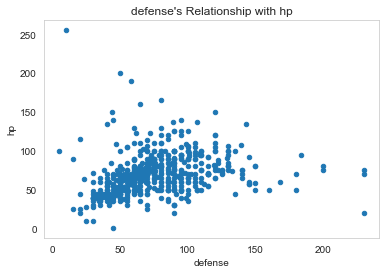

In [84]:
correlation_exploration(train, 'defense','hp')

The p-value is: 1.127792692760258e-81. There is 0.0% chance that we see these results by chance.
r = 0.68


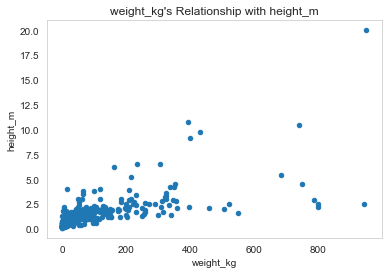

In [85]:
correlation_exploration(train, 'weight_kg','height_m')

The p-value is: 2.5374139065082374e-05. There is 0.0% chance that we see these results by chance.
r = 0.17


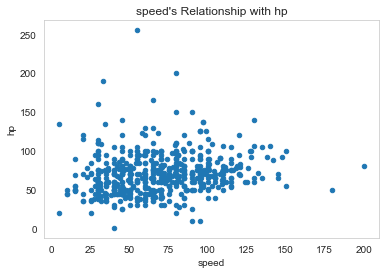

In [86]:
correlation_exploration(train, 'speed','hp')

The p-value is: 0.017244231316205647. There is 0.017% chance that we see these results by chance.
r = 0.1


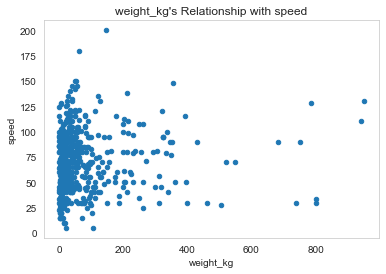

In [87]:
correlation_exploration(train, 'weight_kg','speed')

The p-value is: 2.598616763707073e-15. There is 0.0% chance that we see these results by chance.
r = 0.32


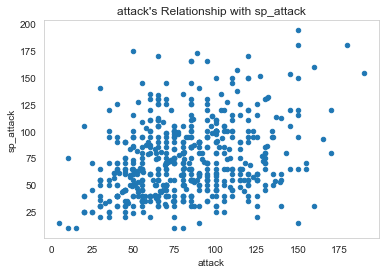

In [88]:
correlation_exploration(train, 'attack','sp_attack')

## Scaling

In [89]:
def split_X_y(train, validate, test, target):
    '''
    Splits train, validate, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [90]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'is_weakness')

In [91]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array(df.dtypes == "object")

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

def get_numeric_X_cols(X_train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in X_train.columns.values if col not in object_cols]
    
    return numeric_cols

In [92]:
train

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_weakness,against_grass_bins
305,254,Mega Sceptile,3,Normal,Forest Pokémon,2,Grass,Dragon,1.9,55.2,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0,"[0, 2)"
36,27,Alolan Sandshrew,1,Normal,Mouse Pokémon,2,Ice,Steel,0.7,40.0,...,0.5,0.5,1.0,1.0,0.5,1.0,1.0,0.5,0,"[0, 2)"
759,653,Fennekin,6,Normal,Fox Pokémon,1,Fire,None,0.4,9.4,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0,"[0, 2)"
476,399,Bidoof,4,Normal,Plump Mouse Pokémon,1,Normal,None,0.5,20.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,"[0, 2)"
278,229,Mega Houndoom,2,Normal,Dark Pokémon,2,Dark,Fire,1.9,49.5,...,0.0,1.0,2.0,0.5,1.0,0.5,0.5,1.0,0,"[0, 2)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,333,Swablu,3,Normal,Cotton Bird Pokémon,2,Normal,Flying,0.4,1.2,...,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0,0,"[0, 2)"
388,325,Spoink,3,Normal,Bounce Pokémon,1,Psychic,None,0.7,30.6,...,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0,"[0, 2)"
778,671,Florges,6,Normal,Garden Pokémon,1,Fairy,None,1.1,10.0,...,1.0,0.5,1.0,1.0,0.0,0.5,2.0,1.0,0,"[0, 2)"
14,11,Metapod,1,Normal,Cocoon Pokémon,1,Bug,None,0.7,9.9,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0,"[0, 2)"
